## Perkenalan

In [1515]:
'''
=================================================
M2

Nama  : Ryan Trisnadi
Batch : HCK-17

Proyek ini dibuat untuk mengilustrasikan dan memproyek kedepan harga rumah di kota Melbourne, Australia. Kita akan menguji dengan Linear regression
dengan beberapa test algorithma seperti SVM, Decision Tree, Random Forest, dan Boosting. Oleh karena itu, kita akan memilih variable "price" atau harga
rumah sebagai target. Dengan mengunakan Pipeline di setiap proses dari Feature Engineering, kita bisa membuat proses lebih efisien dan mencegah data leak. 
Dataset tersebut memiliki beberapa faktor seperti alamat, kode pos, harga rumah, lokasi lingkungan, kamar, kamar mandi, garasi, besar tanah, umur dan 
lain-lain. Dibawah kita akan coba menjawab teori kita dari regresi tersebut:

Pertanyaan (objective):
-Dengan Linear Regression, bisakah kita prediksi harga rumah bisa naik terus?
-Kolom Numerikal apa saja yang memiliki dampak paling besar terhadap harga rumah?
-Apakah ada dampak signifikan antara harga rumah yang dekat CBD (Central Business District) dengan yang jauh? 

Proses pe-modelan akan dillustrasikan dengan beberapa diagram di EDA terhadap pola terhadap faktor yang memiliki relasi atau inferensi terhadap harga 
rumah. Dengan pembuatan analis tersebut, kita akan bisa membuat business recommendation terhadap pembeli rumah atau perusahaan yang tertarik untuk
investasi di properti Melbourne, Australia. 

=================================================
'''

'\n=================================================\nM2\n\nNama  : Ryan Trisnadi\nBatch : HCK-17\n\nProyek ini dibuat untuk mengilustrasikan dan memproyek kedepan harga rumah di kota Melbourne, Australia. Kita akan menguji dengan Linear regression\ndengan beberapa test algorithma seperti SVM, Decision Tree, Random Forest, dan Boosting. Oleh karena itu, kita akan memilih variable "price" atau harga\nrumah sebagai target. Dengan mengunakan Pipeline di setiap proses dari Feature Engineering, kita bisa membuat proses lebih efisien dan mencegah data leak. \nDataset tersebut memiliki beberapa faktor seperti alamat, kode pos, harga rumah, lokasi lingkungan, kamar, kamar mandi, garasi, besar tanah, umur dan \nlain-lain. Dibawah kita akan coba menjawab teori kita dari regresi tersebut:\n\nPertanyaan (objective):\n-Dengan Linear Regression, bisakah kita prediksi harga rumah bisa naik atau turun dari rata-rata?\n-Kolom Numerikal apa saja yang memiliki dampak paling besar terhadap harga rumah?\n-

### Latar Belakang

Kita adalah sebuah analyst yang bekerja di sebuah perusahaan Real Estate Management Firm di Australia yang harus menganalisa harga rumah di setiap daerah di kota Melbourne. Tujuan kita untuk melihat relasi dari setiap faktor-faktor yang akan berguna terhadap pembeli rumah atau perusahaan di satu tahun kemudian. 

### Conceptual Problems
### Jawab pertanyaan berikut:

Jelaskan latar belakang adanya bagging dan cara kerja bagging !

Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

Jelaskan apa yang dimaksud dengan Cross Validation !

## Import Libraries

In [1516]:
# Import Library
# Library Dataframe
import pandas as pd
# Library Numerical Data
import numpy as np
# Library Statistic
from scipy import stats
from scipy.stats import uniform

from kmodes.kprototypes import KPrototypes

# Library Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Library Outlier Handling
from feature_engine.outliers import Winsorizer
# Library Correlation
from scipy.stats import kendalltau, pearsonr, spearmanr

# Save Model
import pickle
import joblib
import json

# To Ignore Warning
import warnings
warnings.filterwarnings("ignore")






# Import Library
# Library Dataframe
import pandas as pd
# Library Numerical Data
import numpy as np
# Library Statistic
from scipy import stats
from scipy.stats import uniform

# Library Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library Preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

# Library Machine Learning Model
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.linear_model import LinearRegression

# Library Model Evaluation
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score , classification_report , confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from scipy.stats import uniform, randint

# Library Outlier Handling
from feature_engine.outliers import Winsorizer
# Library Correlation
from scipy.stats import pearsonr, kendalltau, spearmanr


# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Save Model
import pickle
import joblib
import json

# To Ignore Warning
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

Kita pertama mau impor modul yang akan digunakan untuk menganalisa data dari CSV tersedia. 

## Data Loading and Cleaning

In [1517]:
import pandas as pd

# Replace 'path/to/your/csvfile.csv' with the actual path to your CSV file
file_path = '/Users/ryantrisnadi/Desktop/first_project1/p1-ftds017-hck-m2-ryantrisnadi/melb_data.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path, nrows=2000)

# Display the first few rows of the DataFrame
data

Suburb             Address  Rooms Type      Price Method SellerG  \
0     Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
1     Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
2     Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   
3     Abbotsford    40 Federation La      3    h   850000.0     PI  Biggin   
4     Abbotsford         55a Park St      4    h  1600000.0     VB  Nelson   
...          ...                 ...    ...  ...        ...    ...     ...   
1995      Coburg  3/30 Shaftsbury St      2    u   451000.0      S      RT   
1996      Coburg         211 Bell St      2    h   635000.0      S    Brad   
1997      Coburg      15 Hardwick St      5    h  1020000.0     PI   Raine   
1998      Coburg       6 Hardwick St      3    h   967000.0      S  Nelson   
1999      Coburg       32A Kelson St      3    h  1025000.0     VB  Jellis   

            Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0      3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0   
1      4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0   
2      4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0   
3      4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0   
4      4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0   
...          ...       ...       ...  ...       ...  ...       ...   
1995  24/09/2016       7.8    3058.0  ...       1.0  1.0       0.0   
1996  25/02/2017       7.8    3058.0  ...       2.0  3.0     339.0   
1997  25/02/2017       7.8    3058.0  ...       2.0  4.0     381.0   
1998  25/02/2017       7.8    3058.0  ...       1.0  1.0     169.0   
1999  25/02/2017       7.8    3058.0  ...       1.0  3.0     336.0   

      BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
0              NaN        NaN        Yarra  -37.7996    144.9984   
1             79.0     1900.0        Yarra  -37.8079    144.9934   
2            150.0     1900.0        Yarra  -37.8093    144.9944   
3              NaN        NaN        Yarra  -37.7969    144.9969   
4            142.0     2014.0        Yarra  -37.8072    144.9941   
...            ...        ...          ...       ...         ...   
1995          72.0     1970.0     Moreland  -37.7520    144.9540   
1996         149.0     1920.0     Moreland  -37.7404    144.9559   
1997         286.0     1985.0     Moreland  -37.7492    144.9690   
1998           NaN        NaN     Moreland  -37.7494    144.9681   
1999         112.0     1950.0     Moreland  -37.7408    144.9558   

                 Regionname Propertycount  
0     Northern Metropolitan        4019.0  
1     Northern Metropolitan        4019.0  
2     Northern Metropolitan        4019.0  
3     Northern Metropolitan        4019.0  
4     Northern Metropolitan        4019.0  
...                     ...           ...  
1995  Northern Metropolitan       11204.0  
1996  Northern Metropolitan       11204.0  
1997  Northern Metropolitan       11204.0  
1998  Northern Metropolitan       11204.0  
1999  Northern Metropolitan       11204.0  

[2000 rows x 21 columns]

Ini kita extract data CSV tentang Melbourne Housing Snapshot. Disini kita mau coba manipulasi data seperti delete
duplicate atau Null data jadi extraksi terhadap numerikal kolom lebih jelas untuk dibaca sistem. Juga, kita mau delete beberapa kolom seperti nanti karena dataset memiliki kolom-kolom yang tidak diperlukan untuk analisa ini.


In [1518]:
data.head(10)

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford    40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford         55a Park St      4    h  1600000.0     VB  Nelson   
5  Abbotsford      129 Charles St      2    h   941000.0      S  Jellis   
6  Abbotsford        124 Yarra St      3    h  1876000.0      S  Nelson   
7  Abbotsford       98 Charles St      2    h  1636000.0      S  Nelson   
8  Abbotsford  6/241 Nicholson St      1    u   300000.0      S  Biggin   
9  Abbotsford       10 Valiant St      2    h  1097000.0      S  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   
5  7/05/2016       2.5    3067.0  ...       1.0  0.0     181.0           NaN   
6  7/05/2016       2.5    3067.0  ...       2.0  0.0     245.0         210.0   
7  8/10/2016       2.5    3067.0  ...       1.0  2.0     256.0         107.0   
8  8/10/2016       2.5    3067.0  ...       1.0  1.0       0.0           NaN   
9  8/10/2016       2.5    3067.0  ...       1.0  2.0     220.0          75.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   
5        NaN        Yarra  -37.8041    144.9953  Northern Metropolitan   
6     1910.0        Yarra  -37.8024    144.9993  Northern Metropolitan   
7     1890.0        Yarra  -37.8060    144.9954  Northern Metropolitan   
8        NaN        Yarra  -37.8008    144.9973  Northern Metropolitan   
9     1900.0        Yarra  -37.8010    144.9989  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  
5        4019.0  
6        4019.0  
7        4019.0  
8        4019.0  
9        4019.0  

[10 rows x 21 columns]

Kita akan tampilkan 10 data yang diatas.

In [1519]:
data.tail(10)

Suburb             Address  Rooms Type      Price Method   SellerG  \
1990  Coburg      144 The Avenue      4    h  1250000.0     VB    Nelson   
1991  Coburg       2 Franklin St      2    h  1008000.0      S    Jellis   
1992  Coburg        3/20 Loch St      2    t   599000.0      S       Ray   
1993  Coburg       50a Rennie St      2    h   860000.0      S    Nelson   
1994  Coburg     1 Shaftsbury St      4    h   990000.0     SP  Grantham   
1995  Coburg  3/30 Shaftsbury St      2    u   451000.0      S        RT   
1996  Coburg         211 Bell St      2    h   635000.0      S      Brad   
1997  Coburg      15 Hardwick St      5    h  1020000.0     PI     Raine   
1998  Coburg       6 Hardwick St      3    h   967000.0      S    Nelson   
1999  Coburg       32A Kelson St      3    h  1025000.0     VB    Jellis   

            Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
1990  23/04/2016       7.8    3058.0  ...       3.0  1.0     515.0   
1991  24/09/2016       7.8    3058.0  ...       1.0  3.0     457.0   
1992  24/09/2016       7.8    3058.0  ...       2.0  1.0      76.0   
1993  24/09/2016       7.8    3058.0  ...       1.0  1.0     483.0   
1994  24/09/2016       7.8    3058.0  ...       1.0  1.0     488.0   
1995  24/09/2016       7.8    3058.0  ...       1.0  1.0       0.0   
1996  25/02/2017       7.8    3058.0  ...       2.0  3.0     339.0   
1997  25/02/2017       7.8    3058.0  ...       2.0  4.0     381.0   
1998  25/02/2017       7.8    3058.0  ...       1.0  1.0     169.0   
1999  25/02/2017       7.8    3058.0  ...       1.0  3.0     336.0   

      BuildingArea  YearBuilt  CouncilArea Lattitude  Longtitude  \
1990         249.0     1900.0     Moreland  -37.7537    144.9766   
1991          89.0     1940.0     Moreland  -37.7505    144.9725   
1992           NaN        NaN     Moreland  -37.7474    144.9621   
1993           NaN        NaN     Moreland  -37.7509    144.9696   
1994         142.0     1930.0     Moreland  -37.7537    144.9532   
1995          72.0     1970.0     Moreland  -37.7520    144.9540   
1996         149.0     1920.0     Moreland  -37.7404    144.9559   
1997         286.0     1985.0     Moreland  -37.7492    144.9690   
1998           NaN        NaN     Moreland  -37.7494    144.9681   
1999         112.0     1950.0     Moreland  -37.7408    144.9558   

                 Regionname Propertycount  
1990  Northern Metropolitan       11204.0  
1991  Northern Metropolitan       11204.0  
1992  Northern Metropolitan       11204.0  
1993  Northern Metropolitan       11204.0  
1994  Northern Metropolitan       11204.0  
1995  Northern Metropolitan       11204.0  
1996  Northern Metropolitan       11204.0  
1997  Northern Metropolitan       11204.0  
1998  Northern Metropolitan       11204.0  
1999  Northern Metropolitan       11204.0  

[10 rows x 21 columns]

Kita akan tampilkan 10 data yang dibawah.

In [1520]:
data.shape[0]

2000

Kita lihat beberapa baris kebawah. 

In [1521]:
data.shape[1]

21

Juga akan lihat beberapa kolom-kolom di dataset.

In [1522]:
# Check the structure and basic statistics of the data
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         2000 non-null   object 
 1   Address        2000 non-null   object 
 2   Rooms          2000 non-null   int64  
 3   Type           2000 non-null   object 
 4   Price          2000 non-null   float64
 5   Method         2000 non-null   object 
 6   SellerG        2000 non-null   object 
 7   Date           2000 non-null   object 
 8   Distance       2000 non-null   float64
 9   Postcode       2000 non-null   float64
 10  Bedroom2       2000 non-null   float64
 11  Bathroom       2000 non-null   float64
 12  Car            2000 non-null   float64
 13  Landsize       2000 non-null   float64
 14  BuildingArea   1131 non-null   float64
 15  YearBuilt      1285 non-null   float64
 16  CouncilArea    2000 non-null   object 
 17  Lattitude      2000 non-null   float64
 18  Longtitu

Ini untuk chek tipe dari semua kolom di data CSV. Karena tujuan kita untuk prediksi harga rumah, kelihatannya data yang object bisa di-drop sekaligus sebelum data di train. 

In [1523]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Lihat semua kolom dari table tersebut.

In [1524]:
# Check for missing values
data.isnull().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance           0
Postcode           0
Bedroom2           0
Bathroom           0
Car                0
Landsize           0
BuildingArea     869
YearBuilt        715
CouncilArea        0
Lattitude          0
Longtitude         0
Regionname         0
Propertycount      0
dtype: int64

Disini kelihatan dua kolom "BuildingArea" dan "YearBuilt" yang Null atau kosong. Kita mau drop data tersebut jadi training data model lebih efisien dan tidak merusak disibusi data. 

In [1525]:
#data.drop_duplicates(inplace=True)

In [1526]:
data.duplicated().sum()

0

Kita akan melihat beberapa duplicate yang total di dataset. Kelihatannya tidak ada. 

In [1527]:
data['Date']

0        3/12/2016
1        4/02/2016
2        4/03/2017
3        4/03/2017
4        4/06/2016
           ...    
1995    24/09/2016
1996    25/02/2017
1997    25/02/2017
1998    25/02/2017
1999    25/02/2017
Name: Date, Length: 2000, dtype: object

Kita mau ganti 'Date' tanggal jadi bisa ganti ke "datetime" dengan pandas module. 

In [1528]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [1529]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
#data.set_index('Date', inplace=True)

masukan 'date' ke dataframe jadi bukan object atau string lagi.

In [1530]:
data.head()

Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0 2016-12-03       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1 2016-02-04       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2 2017-03-04       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3 2017-03-04       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4 2016-06-04       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN        Yarra  -37.7996    144.9984  Northern Metropolitan   
1     1900.0        Yarra  -37.8079    144.9934  Northern Metropolitan   
2     1900.0        Yarra  -37.8093    144.9944  Northern Metropolitan   
3        NaN        Yarra  -37.7969    144.9969  Northern Metropolitan   
4     2014.0        Yarra  -37.8072    144.9941  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

Cek setiap kolom jika Date sudah berubah. 

In [1531]:
data = pd.DataFrame(data)

Masukan data ke dataframe. 

## Exploratory Data Analysis

In [1532]:
data['Suburb'].nunique()

34

Kita mau cek unique values dari dari setiap values. 

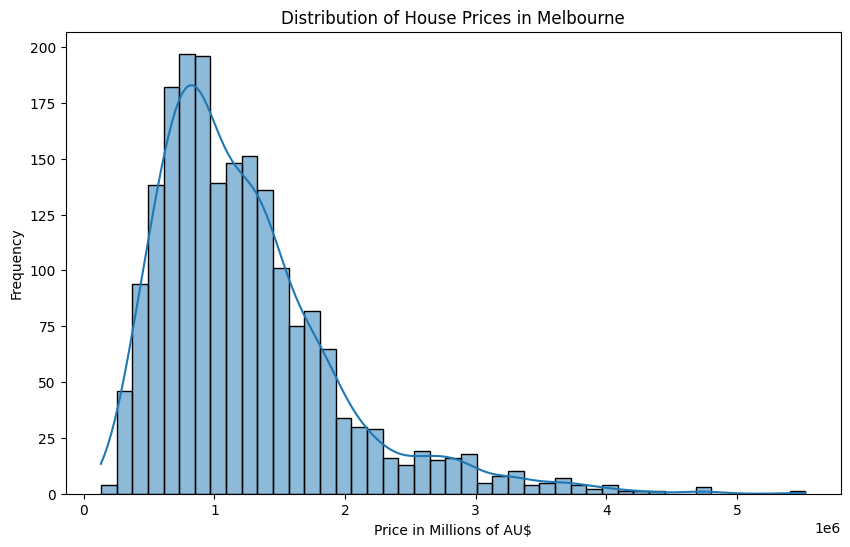

In [1533]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of House Prices in Melbourne')
plt.xlabel('Price in Millions of AU$')
plt.ylabel('Frequency')
plt.show()

Untuk menganalisa harga rumah di kota Melbourne, Australia, kita akan mau lihat distribusinya dengan histogram. Kelihatan dari diagram diatas bahwa harga rumah cenderung berkelompokan di sekitar AU$1 Juta. Harga rumah jarang diatas AU$2 Juta walaupun ada beberapa harga rumah yang jauh lebih mahal di sisi kanan grafik. Skew dari distribusi jadi positif karena di data sample tersebut, lebih banyak rumah lebih murah daripada yang mahal. 

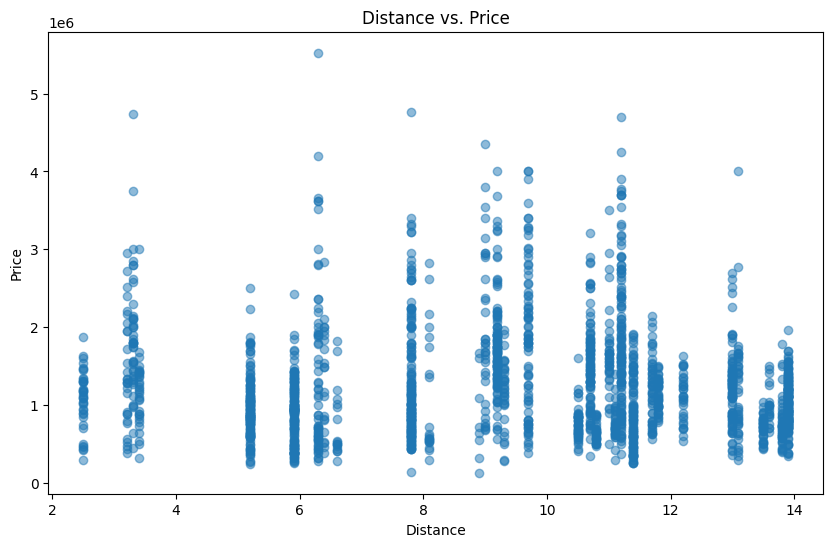

In [1534]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Distance'], data['Price'], alpha=0.5)
plt.title('Distance vs. Price')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.show()


Sekarang kita mau lihat dengan scatterplot salah satu faktor terbesar terhadap harga rumah "distance" atau kejauhan dari pusat kota "CBD". Biasanya harga rumah jauh lebih mahal per meter persegi jika lokasinya lebih dekat ke pusat kota daripada yang dipingir kota. Dari datset tersebut, kelihatannya rumah-rumah yang di dalam sample cukup seimbang dengan harganya, dekat maupun jauh dari pusat. 

Observasi yang cukup menarik adalah harga rumah tidak jauh terlalu murah jika lokasinya lebih jauh dari pusat. Kelihatan diatas ada konsentrasi padat di sisi kanan diagram yang merepresentasikan harga rumah antara AU$ 1 sampai 2 Juta. Bisa dibilang harga rumah sangat rata dan seimbang di seluruh kota Melbourne. Kita nanti mau uji jika kejauhan rumah "distance" adalah faktor yang signifikan.  

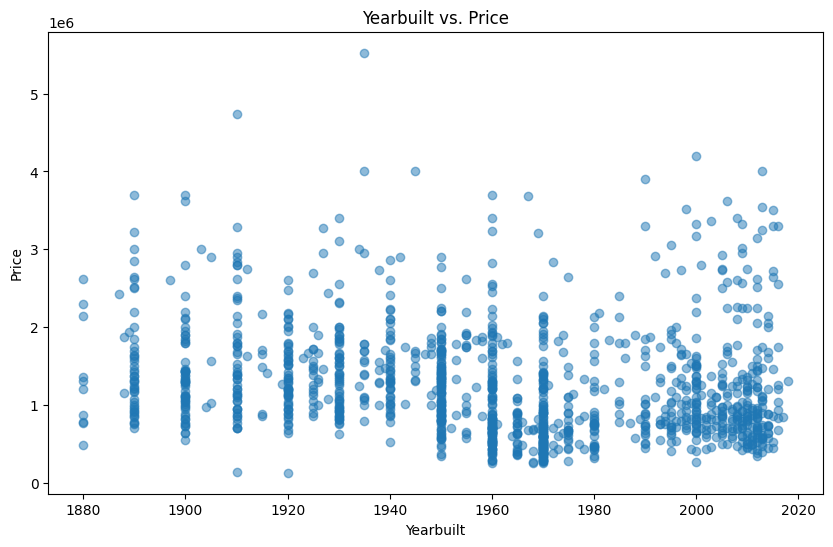

In [1535]:
plt.figure(figsize=(10, 6))
plt.scatter(data['YearBuilt'], data['Price'], alpha=0.5)
plt.title('Yearbuilt vs. Price')
plt.xlabel('Yearbuilt')
plt.ylabel('Price')
plt.show()


Faktor yang juga berdampak terhadap harga rumah adalah tahun pembangunan rumah. Bisasanya rumah lebih mahal jika masih baru dan umurnya kurang dari 10 tahun. Kelihatan di diagram bahwa walaupun rumah-rumah di sample banyak yang dibawah 25 tahun (dari tahun 2000-an), Juga ada banyah rumah yang historis dibangun sebelum tahun 1980-an. Ini artinya rumah-rumah yang di pasar, pernah dijual dan ditangilkan memiliki umur yang sangat beragam, bukan saja rumah yang baru saja yang akan dijual.

Diagram diatas mengatakan bahwa susah untuk mengumpulkan kelompok rumah yang termasuk baru atau tua, karena rumah di kota Melbourne sangat banyak tegantung lingkungannya. 

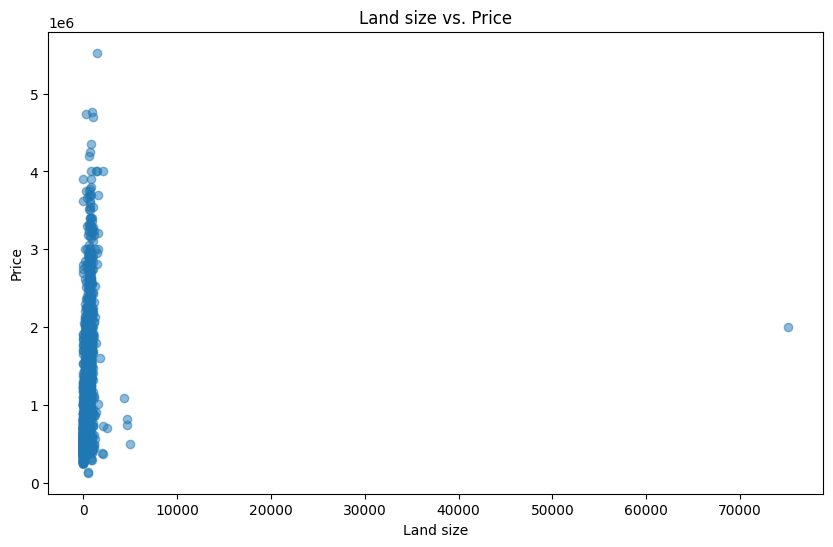

In [1536]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Landsize'], data['Price'], alpha=0.5)
plt.title('Land size vs. Price')
plt.xlabel('Land size')
plt.ylabel('Price')
plt.show()


Kita expektasinya rumah yang memiliki lahan yang lebih besar pasti juga lebih mahal. Diatas diagram kelihatan ada beberapa outlier sample yang terletak di sisi kanan and kiri atas diagram. Rumah-rumah di sample cenderung memiliki ukuran tanah dibawah 5000 square feet, dan harganya bisa menonjol sampai AU$ 5 Juta per rumah. 

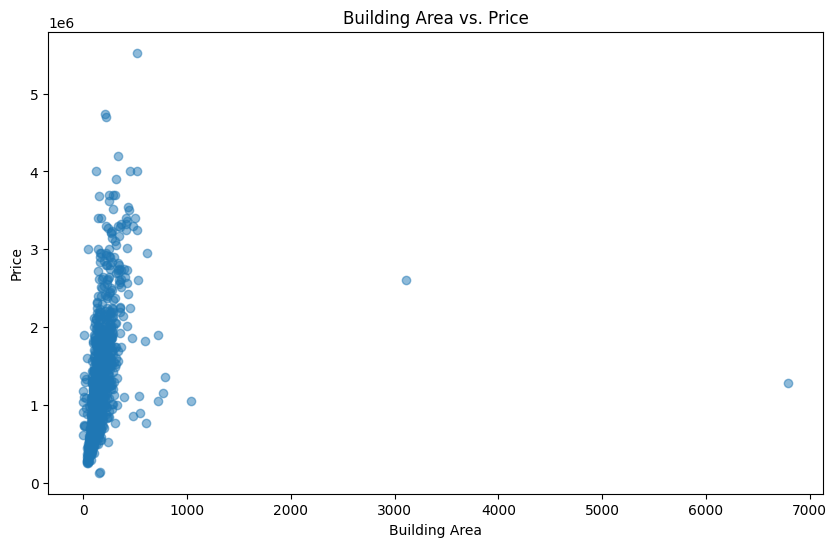

In [1537]:
plt.figure(figsize=(10, 6))
plt.scatter(data['BuildingArea'], data['Price'], alpha=0.5)
plt.title('Building Area vs. Price')
plt.xlabel('Building Area')
plt.ylabel('Price')
plt.show()


Untuk harga besar luas bangunan "Building Area" memiliki trend yang hampir sama dengan "Land size". Korelasi antar harga dan luas bangunan sangat positif dan curam di diagram, artinya luas area adalah salah satu faktor yang berdampak kuat terhadap harga rumah dan bisa prediksi harga di masa depan.

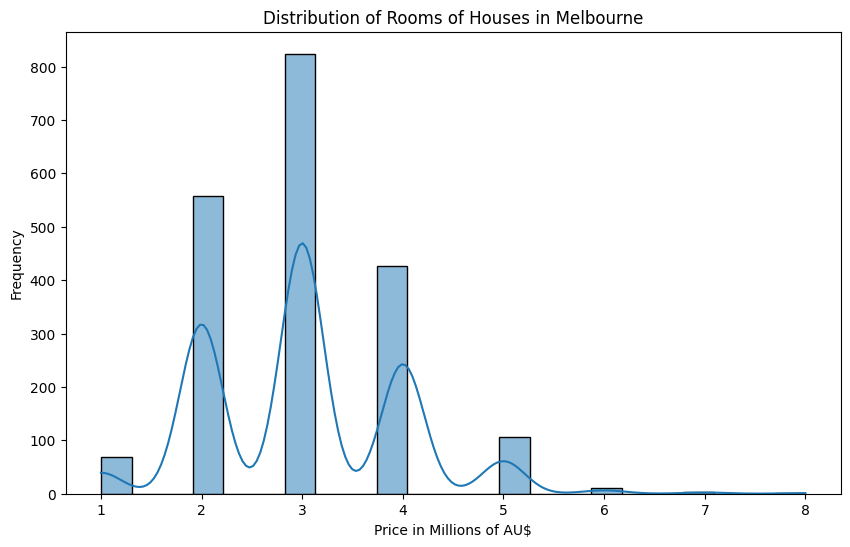

In [1538]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rooms'], kde=True)
plt.title('Distribution of Rooms of Houses in Melbourne')
plt.xlabel('Price in Millions of AU$')
plt.ylabel('Frequency')
plt.show()

Sekarang juga mau lihat distribusi rumah-rumah dengan histogram yang memiliki beberapa banyak banyak kamar. Kelihatan banyak rumah rata-rata memiliki 2 sampai 4 kamar di sample. Karena kebanyakan rumah memiliki tiga kamar, ada bias di dataset yang akan cenderung merepresentasikan rumah tiga-kamar daripada yang lain. 

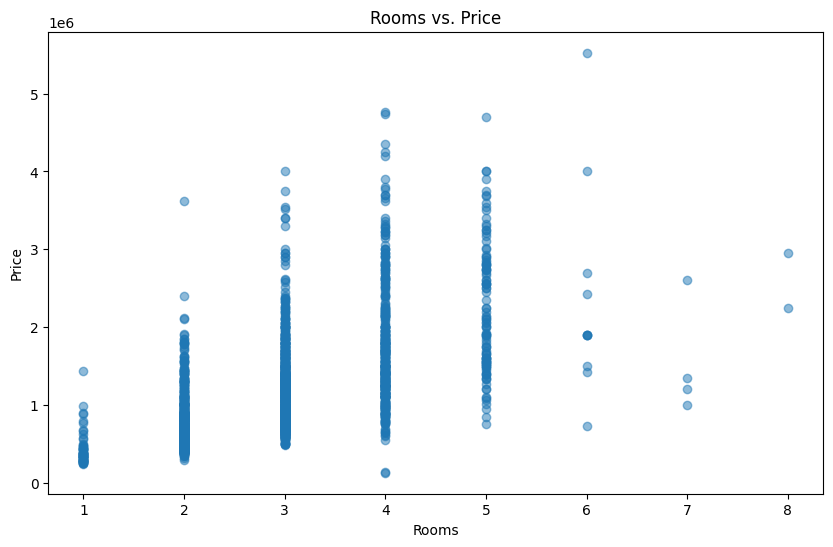

In [1539]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Rooms'], data['Price'], alpha=0.5)
plt.title('Rooms vs. Price')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()


Terlihat bahwa rumah yang memiliki lebih banyak kamar pasti lebih mahal, walaupun rumah yang tiga dan empat-kamar memiliki range yang cukup besar di dataset. Karena tadi terlihat frequency rumah tiga kamar sangat banyak, maka ruangan "rooms" bisa saja tidak proporsional dengan harganya.

Artinya bisa saja rumah dengan lebih sedikit kamar memiliki harga yang bisa lebih tinggi daripada rumah yang banyak kamar. 

In [1540]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         2000 non-null   object        
 1   Address        2000 non-null   object        
 2   Rooms          2000 non-null   int64         
 3   Type           2000 non-null   object        
 4   Price          2000 non-null   float64       
 5   Method         2000 non-null   object        
 6   SellerG        2000 non-null   object        
 7   Date           2000 non-null   datetime64[ns]
 8   Distance       2000 non-null   float64       
 9   Postcode       2000 non-null   float64       
 10  Bedroom2       2000 non-null   float64       
 11  Bathroom       2000 non-null   float64       
 12  Car            2000 non-null   float64       
 13  Landsize       2000 non-null   float64       
 14  BuildingArea   1131 non-null   float64       
 15  YearBuilt      1285 n

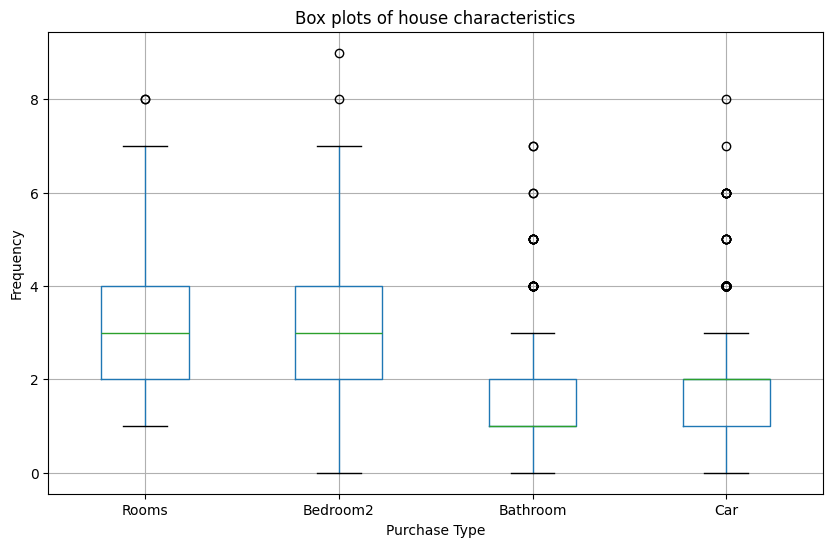

In [1541]:
plt.figure(figsize=(10, 6))
data[['Rooms','Bedroom2', 'Bathroom', 'Car']].boxplot()
plt.title('Box plots of house characteristics')
plt.xlabel('Purchase Type')
plt.ylabel('Frequency')
plt.show()


Untuk Box plot, diagram mengatakan rumah rumah di Melbourne mempunyai rata-rata 3 kamar total, 3 kamar tidur, 1 kamar mandi, dan 2 mobil garasi. Ada beberapa sample karakteristik rumah yang mempunyai outlier besar seperti kamar mandi atau garasi karena ada sekelompok rumah-rumahan yang memiliki fitur lebih mewah dari yang lain. Diagram outlier adalah justifikasi terhadap variansi harga rumah.

Segala-galanya, rumah-rumah tersebut jarang memiliki fitur yang sangat beda sekali atau variansi besar. Oleh karena itu bisa lebih mudah prediksi rumah apa saja yang dimaukan pembeli atau investor. 

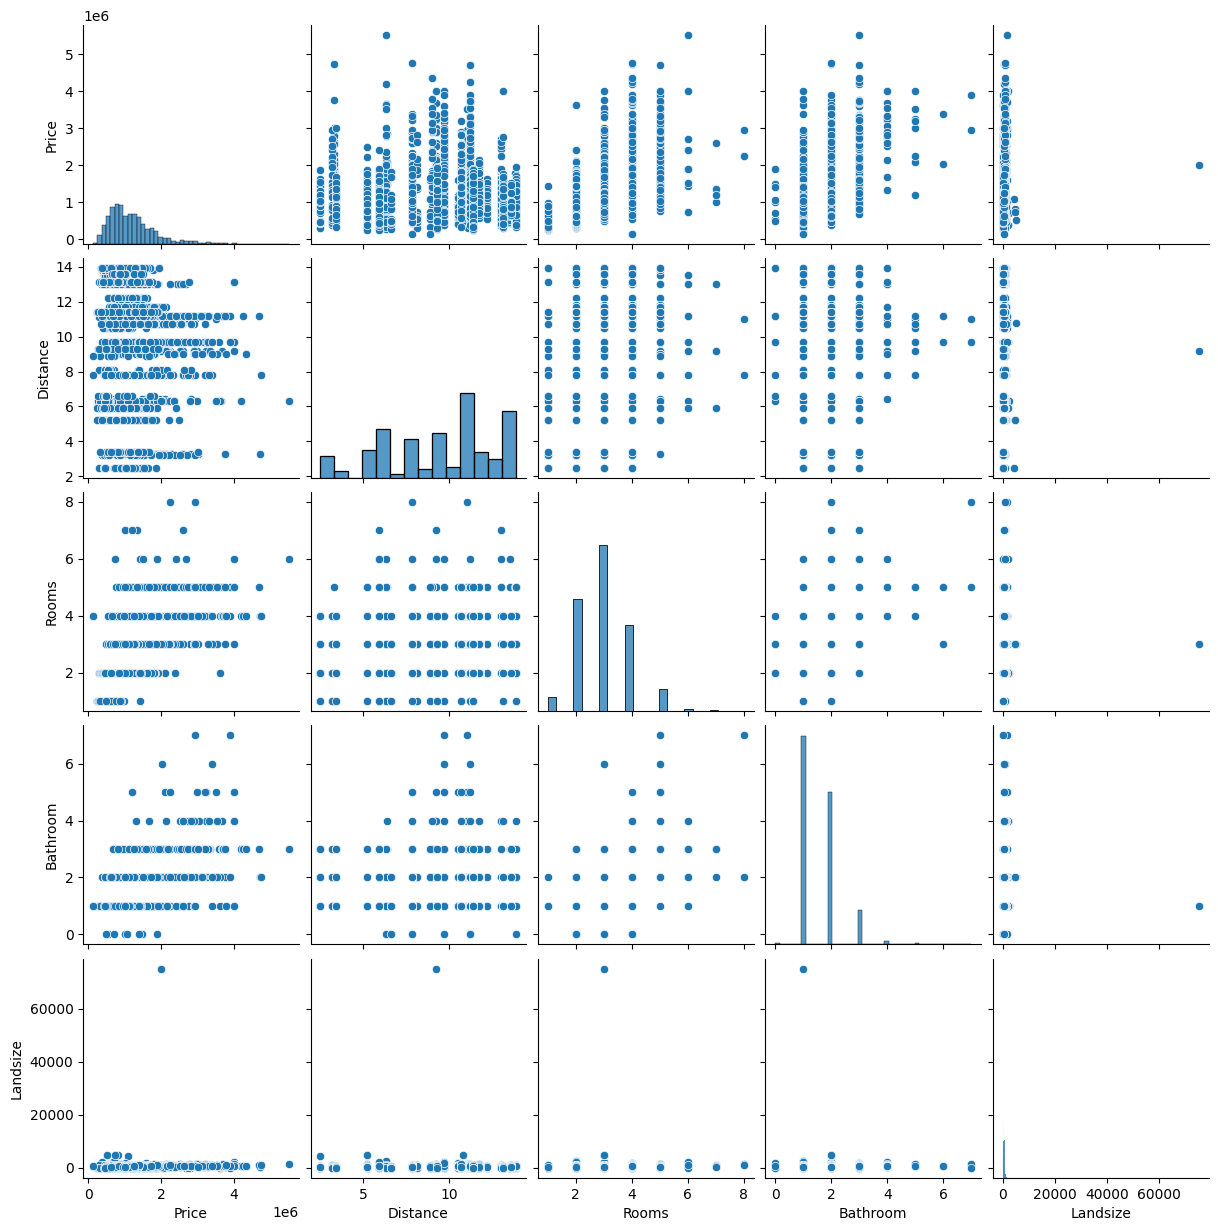

In [1542]:
sns.pairplot(data, vars=['Price', 'Distance', 'Rooms', 'Bathroom', 'Landsize'])
plt.show()

Dengan SNS plot, kita mau coba cari linear relationship antar beberapa faktor harga rumah. Walaupun semua faktor ada dampak positif terhadap harga, Landsize memiliki trend yang sangat datar dan faktor lain lebih tersebar diseluruh graph. 

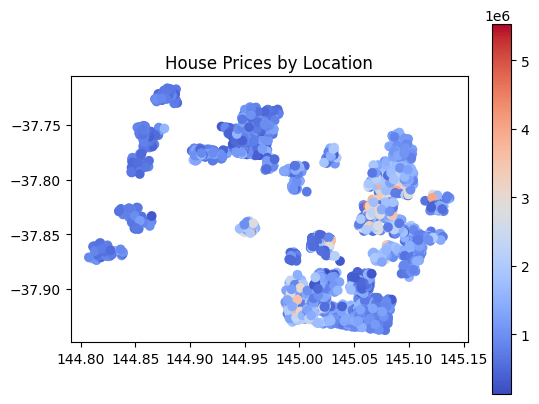

In [1543]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.Longtitude, data.Lattitude))
gdf.plot(column='Price', cmap='coolwarm', legend=True)
plt.title('House Prices by Location')
plt.show()

Peta kota Melbourne: 

https://www.google.com/maps/place/Melbourne+VIC,+Australia/@-37.9715652,144.7235004,108702m/data=!3m2!1e3!4b1!4m6!3m5!1s0x6ad646b5d2ba4df7:0x4045675218ccd90!8m2!3d-37.8136276!4d144.9630576!16zL20vMGNoZ3pt?entry=ttu

Dengan fitur GeoDataframe, kita bisa melihat lokasi setiap datapoint rumah di topografi kota Melbourne. Bisa terlihat rumah-rumahnya dari koordinasi Longitude dan Latitude sangat berkelompokan di satu daerah dari yang lain. 

Harga rumah yang rata-rata paling mahal terletak di sisi kanan bawah peta, dan yang paling murah di sisi kiri atas.

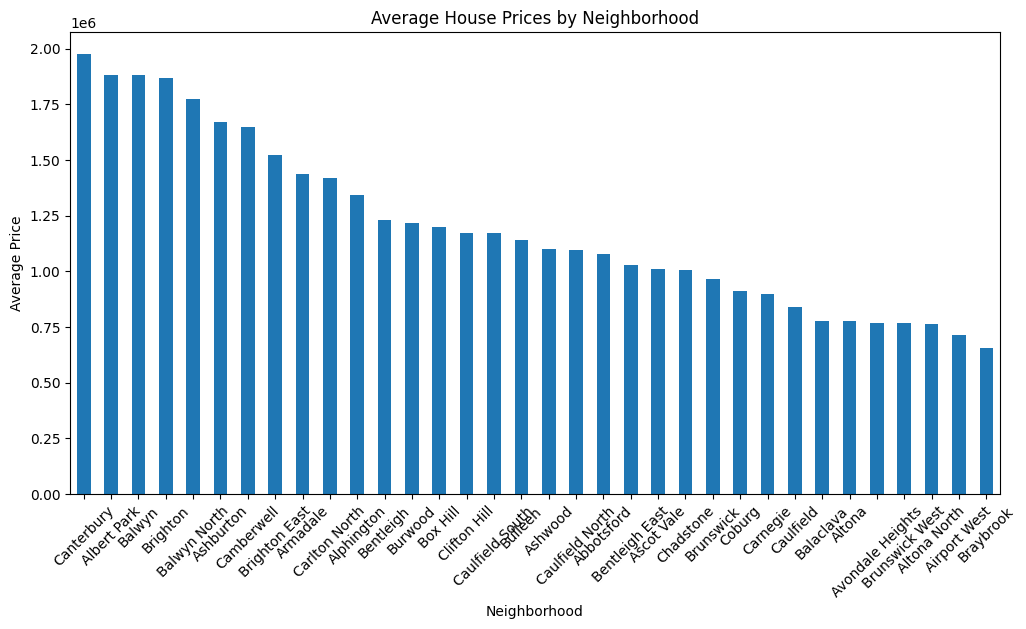

In [1544]:


# Group by neighborhood and calculate the average price
neighborhood_avg_prices = data.groupby('Suburb')['Price'].mean()

# Sort by average price (optional)
neighborhood_avg_prices = neighborhood_avg_prices.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
neighborhood_avg_prices.plot(kind='bar')
plt.title('Average House Prices by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


Untuk lihat harga rata-rata untuk setiap perumahan lingkungan, kita akan membuat bar chart untuk memperbandingkan harga dari satu lokasi ke yang lain. Variasi dari satu perumahan seperti "Canterbury" memiliki harga rumah yang hampir AU$ 2 Juta, dan yang paling murah itu "Braybrook" yang cuman AU$ 750 Ribu. 

Dengan perbedaan harga antar perumahan sampai 2.67x lipat dari yang mahal dan murah, maka variansi sangat signifikan di kota Melbourne dan ada stratifikasi kelas sosial yang memisah orang yang pemilik rumah biasa dan yang paling mampu.    

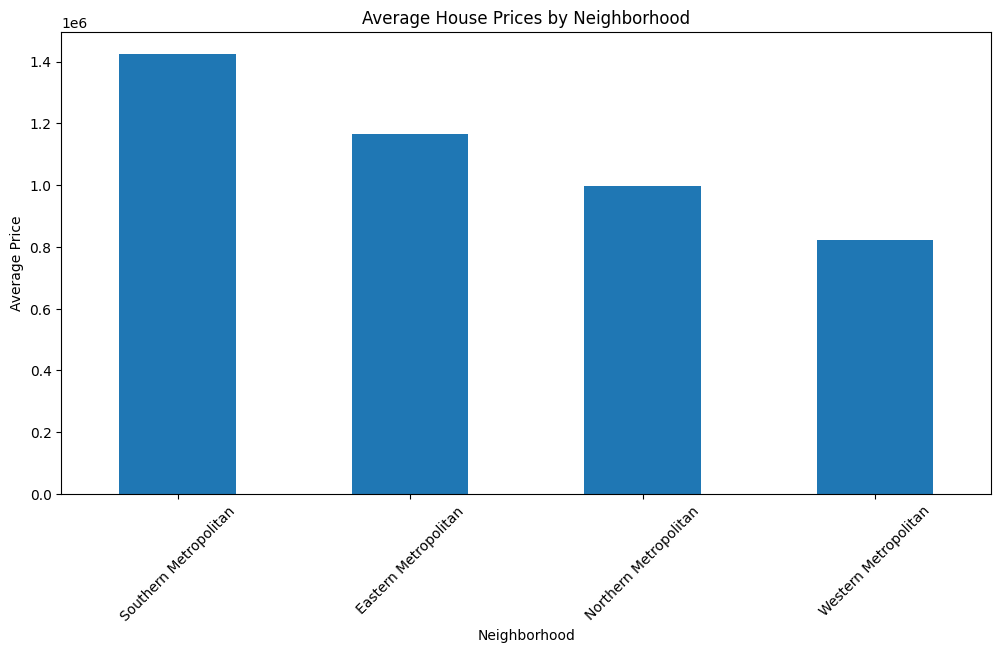

In [1545]:


# Group by neighborhood and calculate the average price
neighborhood_avg_prices = data.groupby('Regionname')['Price'].mean()

# Sort by average price (optional)
neighborhood_avg_prices = neighborhood_avg_prices.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
neighborhood_avg_prices.plot(kind='bar')
plt.title('Average House Prices by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


Tadi dari peta kelihatan bahwa daerah selatan memiliki rumah-rumah yang paling mahal, dan yang di daerah barat yang paling murah. Bisa saja perumahan yang paling murah berkelompokan di sisi barat, dan pemilik rumah yang lebih mampu tinggal di dearah selatan dekat pantai.

Karena jarak dari daerah selatan dan CBD cukup jauh, maka tidak bisa dibilang bahwa "distance" adalah faktor yang paling pengaruh terhadap harga rumah. 

In [1546]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         2000 non-null   object        
 1   Address        2000 non-null   object        
 2   Rooms          2000 non-null   int64         
 3   Type           2000 non-null   object        
 4   Price          2000 non-null   float64       
 5   Method         2000 non-null   object        
 6   SellerG        2000 non-null   object        
 7   Date           2000 non-null   datetime64[ns]
 8   Distance       2000 non-null   float64       
 9   Postcode       2000 non-null   float64       
 10  Bedroom2       2000 non-null   float64       
 11  Bathroom       2000 non-null   float64       
 12  Car            2000 non-null   float64       
 13  Landsize       2000 non-null   float64       
 14  BuildingArea   1131 non-null   float64       
 15  YearBuilt      1285 n

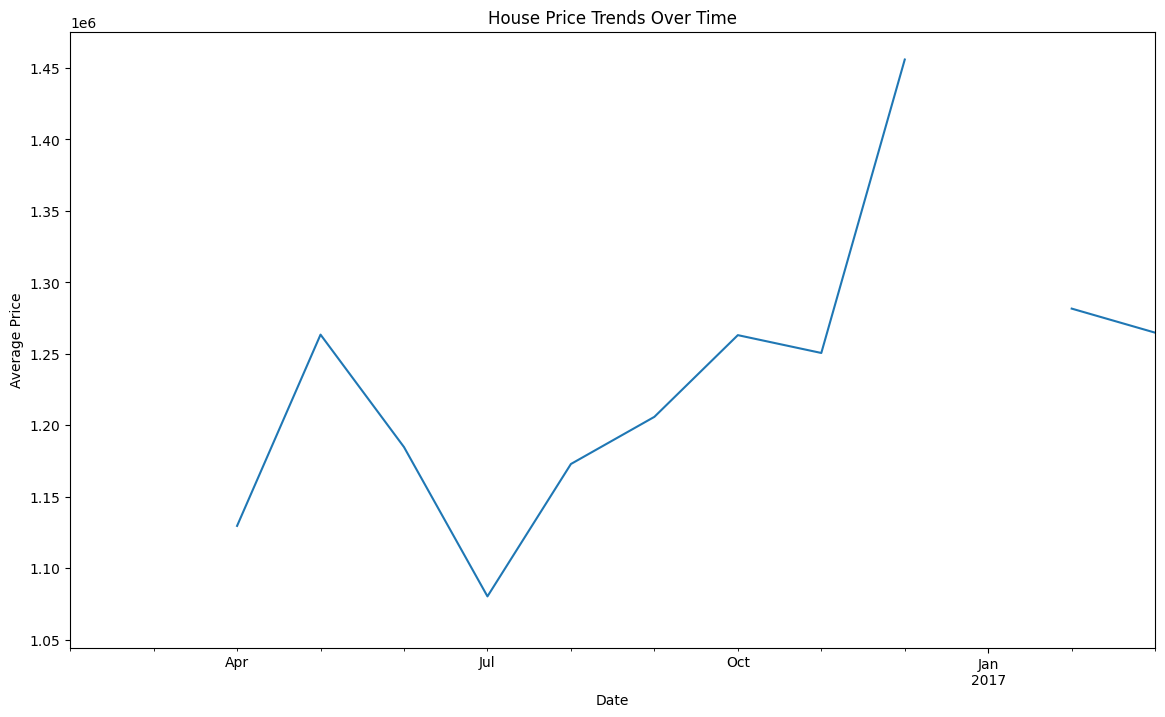

In [1547]:
data.set_index('Date', inplace=True)
data['Price'].resample('M').mean().plot(figsize=(14, 8))
plt.title('House Price Trends Over Time')
plt.ylabel('Average Price')
plt.show()

Untuk melihat trend harga rumah di seluruh kota dengan time-series, kita buat line graph. Kelihatan di diagram ada "missing values" di dataset karena tidak semua penjual akan ingat taruh data rumah. Kita akan coba "smoothen" grafik tersebut jadi garis-nya akan terhubung dengan jelas. 

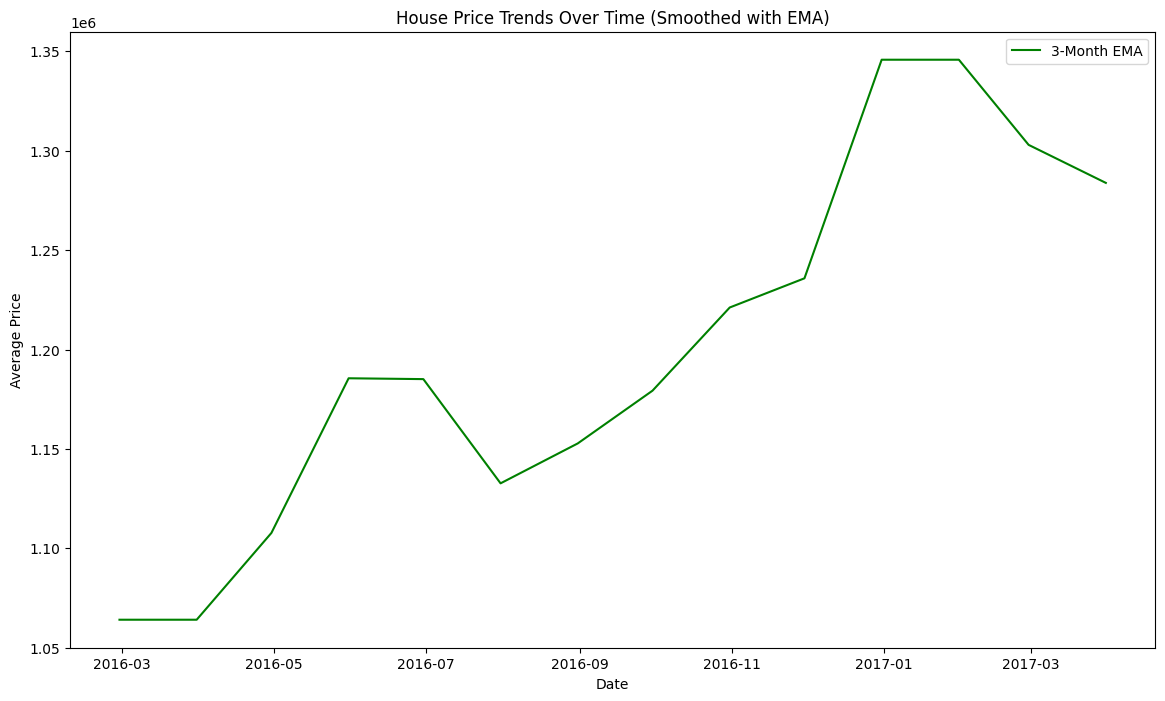

In [1548]:
# Calculate the exponential moving average with a span of your choice, e.g., 3 months
ema = data['Price'].resample('M').mean().ewm(span=3, adjust=False).mean()

# Plot the smoothed time series using EMA
plt.figure(figsize=(14, 8))
plt.plot(ema, label='3-Month EMA', color='green')
plt.title('House Price Trends Over Time (Smoothed with EMA)')
plt.ylabel('Average Price')
plt.xlabel('Date')
plt.legend()
plt.show()

Tadi data diubah dengan "3-month average", atau melihat harga tiga bulan kebelakang. Teknik tersebut digunakan untuk mencoba mendapatkan harga rata-rata untuk missing values, dan karena ada "lag" 3 bulan maka kurva lebih halus. 

Dari diagram, kelihatan harga rumah telah naik cepat dari awal tahun 2016, terus berpuncak di tengan 2016-an. Waktu masuk bulan pertama-tama tahun 2017, harga rumah berpuncak lagi dengan harga max AU$ 1.35 Juta. Ini bisa dibilang harga rumah di Melbourne itu sangat seasonal, dan setiap 3 sampai 6 bulan trend harga rumah susah diprediksi karena pola konsumer bisa beli dan jual cepat sekali. 

Pada tahun 2017, kelihatan harga rumah telah menurun dari AU$ 1.35 sampai 1.3 Juta saja. Ini bisakah menjadi trend temporary atau juga bisa lebih jangkau panjang / permanent. 

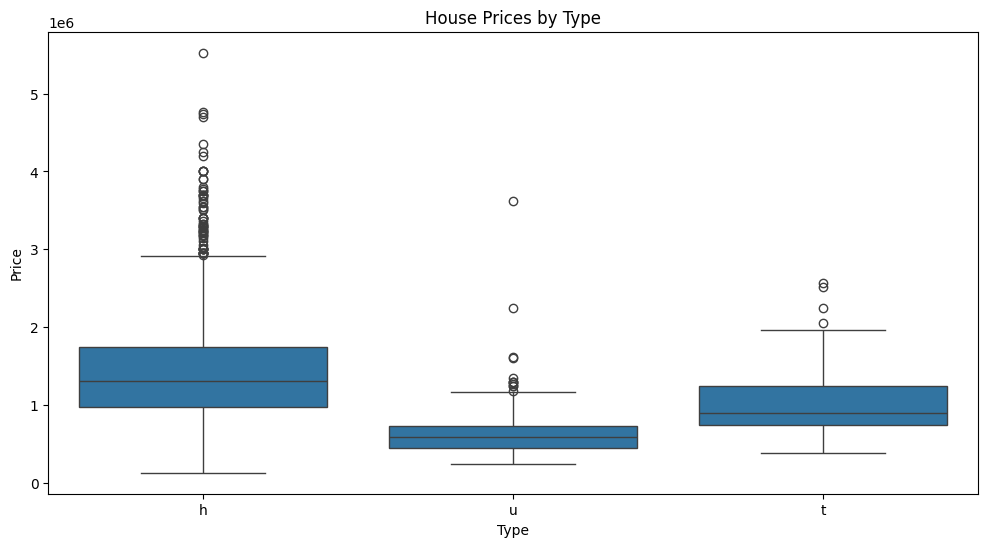

In [1549]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type', y='Price', data=data)
plt.title('House Prices by Type')
plt.show()

In [1550]:
"""
Legend:

Type: br - bedroom(s); 
h - house,cottage,villa, semi,terrace; 
u - unit, duplex; 
t - townhouse; 
dev site - development site; 
o res - other residential.
"""

'\nLegend:\n\nType: br - bedroom(s); \nh - house,cottage,villa, semi,terrace; \nu - unit, duplex; \nt - townhouse; \ndev site - development site; \no res - other residential.\n'

Disini bisa di-observasi bahwa harga rumah "house/cottage/villa/terrace" lebih mahal pada rata-ratanya daripada "unit" atau "townhouse". Bisa saja harga rumah termasuk kelas Mansion atau rumah yang sangat mewah seperti Bungalow, dan ini akan mengangkat harga rumah sebagai total.

Bisa terlihat banyak outlier diatas IQR boundaries untuk tipe "H" atau "house".

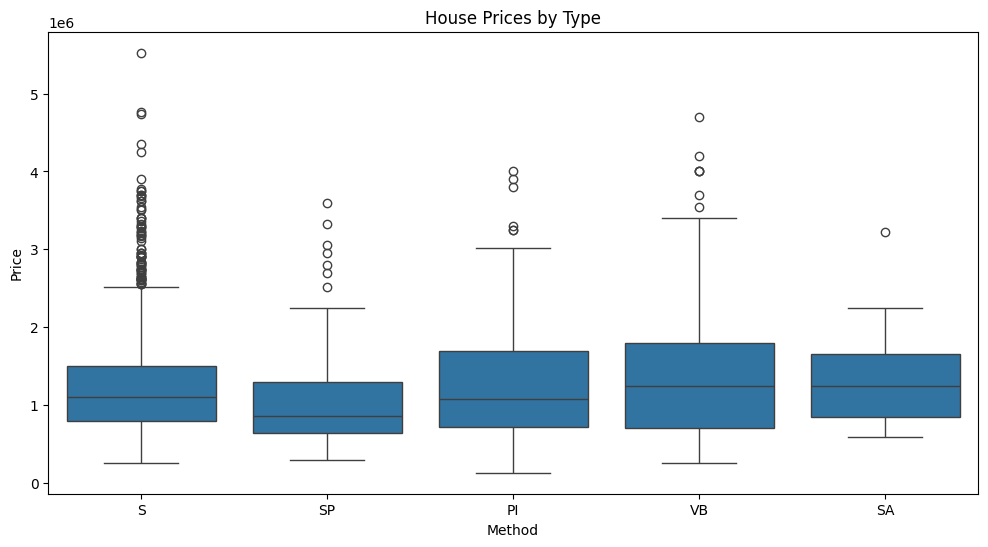

In [1551]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Method', y='Price', data=data)
plt.title('House Prices by Type')
plt.show()

In [1552]:
"""
Legend:

Method: 
S - property sold; 
SP - property sold prior; 
PI - property passed in; 
PN - sold prior not disclosed; 
SN - sold not disclosed; 
NB - no bid; 
VB - vendor bid; 
W - withdrawn prior to auction; 
SA - sold after auction; 
SS - sold after auction price not disclosed. 
N/A - price or highest bid not available.
"""

'\nLegend:\n\nMethod: \nS - property sold; \nSP - property sold prior; \nPI - property passed in; \nPN - sold prior not disclosed; \nSN - sold not disclosed; \nNB - no bid; \nVB - vendor bid; \nW - withdrawn prior to auction; \nSA - sold after auction; \nSS - sold after auction price not disclosed. \nN/A - price or highest bid not available.\n'

Juga bisa dibandingkan harga rumah yang dijual dengan beberapa cara metode. Jika dilihat rata-rata kelompok rumah yang dijual pakai metode beda-beda, kelihatan cara vendor bid atau lelang memiliki harga tertinggi. Ini bisakah karena lelang atau "Auction" cenderung mendorong harga lebih tinggi dari penjualan rumah biasa, juga untuk "PI" atau "Property Passed In" juga memiliki harga yang lebih tinggi pada rata-ratanya. 

Ini artinya rumah yang dijual baru tidak selalu yang paling mahal, maka rumah yang dijual di second-hand-market bisa lebih mahal dari harga pasaran. 

In [1553]:
data['Suburb'].nunique()

34

In [1554]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

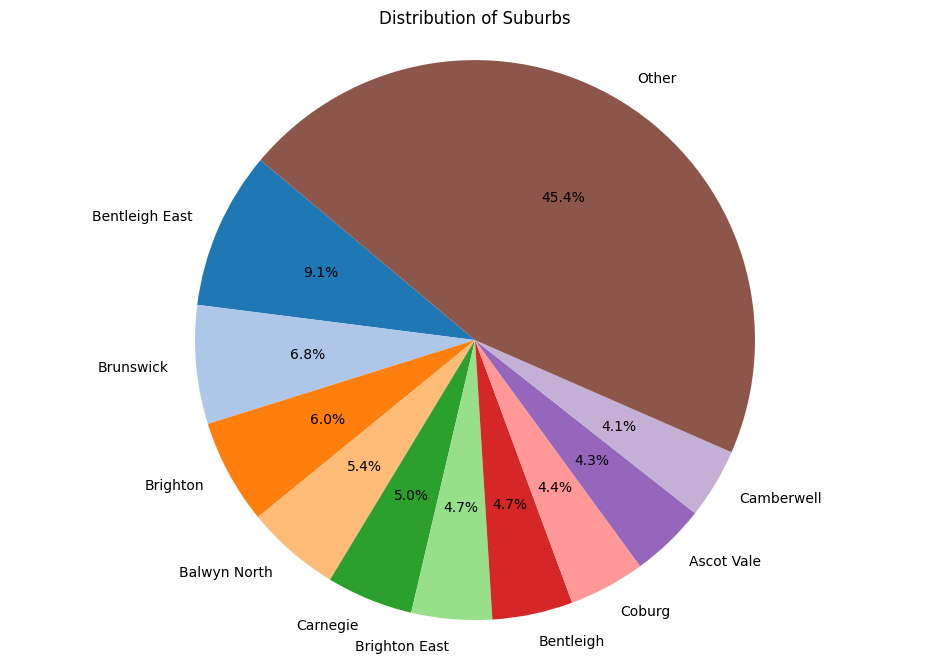

In [1555]:
# Count occurrences of each suburb
suburb_counts = data['Suburb'].value_counts()

# Display the top N suburbs (e.g., top 10) if there are too many suburbs
top_n = 10
suburb_counts_top_n = suburb_counts.head(top_n)

# If there are too many suburbs, group the remaining into an "Other" category
if len(suburb_counts) > top_n:
    suburb_counts_top_n['Other'] = suburb_counts[top_n:].sum()

# Data for the pie chart
labels = suburb_counts_top_n.index
sizes = suburb_counts_top_n.values

# Plotting the pie chart
plt.figure(figsize=(12, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Suburbs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Terakhir, kita mau lihat mana lingkungan perumahan yang paling besar direpresentasikan di dataset. Kelihatan bahwa dari setiap "Suburb" sangat rata dalam jumlah rumahnya ke yang lain, ini artinya dataset sangat seimbang untuk pilih rumahnya dari bermacam tempat. Rata rata setiap lingkungan memiliki 5 atau 6% jumlah rumah dari total, jadi tidak terlalu bias terhadap satu daerah saja.  

In [1556]:
data.head()

Suburb           Address  Rooms Type      Price Method  \
Date                                                                     
2016-12-03  Abbotsford      85 Turner St      2    h  1480000.0      S   
2016-02-04  Abbotsford   25 Bloomburg St      2    h  1035000.0      S   
2017-03-04  Abbotsford      5 Charles St      3    h  1465000.0     SP   
2017-03-04  Abbotsford  40 Federation La      3    h   850000.0     PI   
2016-06-04  Abbotsford       55a Park St      4    h  1600000.0     VB   

           SellerG  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
Date                                                                        
2016-12-03  Biggin       2.5    3067.0       2.0       1.0  1.0     202.0   
2016-02-04  Biggin       2.5    3067.0       2.0       1.0  0.0     156.0   
2017-03-04  Biggin       2.5    3067.0       3.0       2.0  0.0     134.0   
2017-03-04  Biggin       2.5    3067.0       3.0       2.0  1.0      94.0   
2016-06-04  Nelson       2.5    3067.0       3.0       1.0  2.0     120.0   

            BuildingArea  YearBuilt CouncilArea  Lattitude  Longtitude  \
Date                                                                     
2016-12-03           NaN        NaN       Yarra   -37.7996    144.9984   
2016-02-04          79.0     1900.0       Yarra   -37.8079    144.9934   
2017-03-04         150.0     1900.0       Yarra   -37.8093    144.9944   
2017-03-04           NaN        NaN       Yarra   -37.7969    144.9969   
2016-06-04         142.0     2014.0       Yarra   -37.8072    144.9941   

                       Regionname  Propertycount  
Date                                              
2016-12-03  Northern Metropolitan         4019.0  
2016-02-04  Northern Metropolitan         4019.0  
2017-03-04  Northern Metropolitan         4019.0  
2017-03-04  Northern Metropolitan         4019.0  
2016-06-04  Northern Metropolitan         4019.0

In [1557]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

In [1558]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2000 entries, 2016-12-03 to 2017-02-25
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         2000 non-null   object 
 1   Address        2000 non-null   object 
 2   Rooms          2000 non-null   int64  
 3   Type           2000 non-null   object 
 4   Price          2000 non-null   float64
 5   Method         2000 non-null   object 
 6   SellerG        2000 non-null   object 
 7   Distance       2000 non-null   float64
 8   Postcode       2000 non-null   float64
 9   Bedroom2       2000 non-null   float64
 10  Bathroom       2000 non-null   float64
 11  Car            2000 non-null   float64
 12  Landsize       2000 non-null   float64
 13  BuildingArea   1131 non-null   float64
 14  YearBuilt      1285 non-null   float64
 15  CouncilArea    2000 non-null   object 
 16  Lattitude      2000 non-null   float64
 17  Longtitude     2000 non-null   flo

In [1559]:
# Create a copy of the original DataFrame
data_mod = data.copy()

#del data_mod['Date']
del data_mod['Suburb'] #delete karena bukan ordinal, tidak bisa buat inferensi yang efektif
del data_mod['Address'] #delete karena bukan ordinal, tidak bisa buat inferensi yang efektif
del data_mod['Type'] #delete karena bukan ordinal, tidak bisa buat inferensi yang efektif
del data_mod['Method'] #delete karena bukan ordinal, tidak bisa buat inferensi yang efektif
del data_mod['SellerG'] #penjualnya tidak terlalu penting untuk analisa
del data_mod['Postcode'] #delete karena bukan ordinal, tidak bisa buat inferensi yang efektif
del data_mod['Bedroom2'] #ini double sample dari yang "Rooms", tidak perlu data extra 
del data_mod['CouncilArea'] #delete karena bukan ordinal, tidak bisa buat inferensi yang efektif
del data_mod['Lattitude'] #tidak digunakan lagi untuk analisa
del data_mod['Longtitude'] #tidak digunakan lagi untuk analisa
del data_mod['Regionname'] #delete karena bukan ordinal, tidak bisa buat inferensi yang efektif

Sekarang kita mau delete kolom yang tidak digunakan untuk analisa kita terhadap harga rumah. Kebanyakan data di-analisa tadi memiliki data tipe kategorikal dan "ordinal", jadi kita tidak bisa urutkan mana yang lebih berguna atau penting. Ini akan susah untuk model untuk mengolah data karena kolom numerikal akan paling digunakan untuk linear regression.   

In [1560]:
print("\nModified DataFrame:")
data_mod


Modified DataFrame:


Rooms      Price  Distance  Bathroom  Car  Landsize  BuildingArea  \
Date                                                                            
2016-12-03      2  1480000.0       2.5       1.0  1.0     202.0           NaN   
2016-02-04      2  1035000.0       2.5       1.0  0.0     156.0          79.0   
2017-03-04      3  1465000.0       2.5       2.0  0.0     134.0         150.0   
2017-03-04      3   850000.0       2.5       2.0  1.0      94.0           NaN   
2016-06-04      4  1600000.0       2.5       1.0  2.0     120.0         142.0   
...           ...        ...       ...       ...  ...       ...           ...   
2016-09-24      2   451000.0       7.8       1.0  1.0       0.0          72.0   
2017-02-25      2   635000.0       7.8       2.0  3.0     339.0         149.0   
2017-02-25      5  1020000.0       7.8       2.0  4.0     381.0         286.0   
2017-02-25      3   967000.0       7.8       1.0  1.0     169.0           NaN   
2017-02-25      3  1025000.0       7.8       1.0  3.0     336.0         112.0   

            YearBuilt  Propertycount  
Date                                  
2016-12-03        NaN         4019.0  
2016-02-04     1900.0         4019.0  
2017-03-04     1900.0         4019.0  
2017-03-04        NaN         4019.0  
2016-06-04     2014.0         4019.0  
...               ...            ...  
2016-09-24     1970.0        11204.0  
2017-02-25     1920.0        11204.0  
2017-02-25     1985.0        11204.0  
2017-02-25        NaN        11204.0  
2017-02-25     1950.0        11204.0  

[2000 rows x 9 columns]

Lihat dataframe baru kita. 

### Split Train Test

In [1561]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data_mod.drop('Price', axis=1)
y = data_mod['Price'] #yang di prediksi

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

Kita akan coba split-train test untuk menguji dataset yang baru dimodifikasi. Kita akan ambil test size 20%, jadi training dataset akan ambil 80% data yang pertama. Untuk target variable, kita pastikan pilih "price" untuk dipisahkan dari kolom lain. 

In [1562]:
X_train

Rooms  Distance  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
Date                                                                            
2016-08-28      3       3.3       2.0  2.0     147.0         134.0     1890.0   
2016-06-18      3      11.0       1.0  1.0     227.0           NaN        NaN   
2016-09-10      2       7.8       1.0  1.0       0.0          80.0     1965.0   
2016-07-30      4       6.4       2.0  3.0     589.0         210.0     1920.0   
2016-06-18      2      13.9       1.0  2.0     678.0           NaN        NaN   
...           ...       ...       ...  ...       ...           ...        ...   
2016-07-30      2       9.7       0.0  0.0    1611.0           NaN        NaN   
2017-02-11      3       5.2       2.0  3.0     177.0           NaN        NaN   
2016-09-17      4       5.9       2.0  2.0     597.0         180.0     1939.0   
2017-03-04      8       7.8       2.0  4.0     983.0           NaN        NaN   
2016-07-30      3      11.2       2.0  2.0     266.0           NaN     2000.0   

            Propertycount  
Date                       
2016-08-28         3280.0  
2016-06-18         3052.0  
2016-09-10        11204.0  
2016-07-30         2211.0  
2016-06-18        10969.0  
...                   ...  
2016-07-30         5682.0  
2017-02-11        11918.0  
2016-09-17         6567.0  
2017-03-04        11204.0  
2016-07-30        10579.0  

[1600 rows x 8 columns]

Di dataset X_train kelihatan ada beberapa Null atau missing values, kita harus rapihkan nanti sebelum di Feature Engineering. 

In [1563]:
y_train

Date
2016-08-28    1740000.0
2016-06-18     968000.0
2016-09-10     434000.0
2016-07-30    1950000.0
2016-06-18    1120000.0
                ...    
2016-07-30    1010000.0
2017-02-11     810000.0
2016-09-17    1480000.0
2017-03-04    2250000.0
2016-07-30    1600000.0
Name: Price, Length: 1600, dtype: float64

y_train memiliki variable "price". 

### Handling Missing Values

In [1564]:
y_train = y_train.fillna(y_train.median())

In [1565]:
y_test = y_train.fillna(y_train.median())

In [1566]:
y_train_clean = y_train.dropna()

In [1567]:
y_test_clean = y_test.dropna()

In [1568]:
X_train = X_train.fillna(X_train.median())

In [1569]:
X_test = X_train.fillna(X_train.median())

In [1570]:
X_train_clean = X_train.dropna()

In [1571]:
X_test_clean = X_test.dropna()

Kita akan coba buang Null data dan masukan fungsi "fill" jadi tidak ada yang kosong. Ini akan penting untuk model yang akan membaca kolom-kolom dataset X dan y. 

In [1572]:
y_train_clean.isnull().sum()

0

In [1573]:
X_train_clean.isnull().sum()

Rooms            0
Distance         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Propertycount    0
dtype: int64

Kelihatan tidak ada Null values lagi. 

### Handling Outliers

In [1574]:
X_train

Rooms  Distance  Bathroom  Car  Landsize  BuildingArea  YearBuilt  \
Date                                                                            
2016-08-28      3       3.3       2.0  2.0     147.0         134.0     1890.0   
2016-06-18      3      11.0       1.0  1.0     227.0         132.0     1960.0   
2016-09-10      2       7.8       1.0  1.0       0.0          80.0     1965.0   
2016-07-30      4       6.4       2.0  3.0     589.0         210.0     1920.0   
2016-06-18      2      13.9       1.0  2.0     678.0         132.0     1960.0   
...           ...       ...       ...  ...       ...           ...        ...   
2016-07-30      2       9.7       0.0  0.0    1611.0         132.0     1960.0   
2017-02-11      3       5.2       2.0  3.0     177.0         132.0     1960.0   
2016-09-17      4       5.9       2.0  2.0     597.0         180.0     1939.0   
2017-03-04      8       7.8       2.0  4.0     983.0         132.0     1960.0   
2016-07-30      3      11.2       2.0  2.0     266.0         132.0     2000.0   

            Propertycount  
Date                       
2016-08-28         3280.0  
2016-06-18         3052.0  
2016-09-10        11204.0  
2016-07-30         2211.0  
2016-06-18        10969.0  
...                   ...  
2016-07-30         5682.0  
2017-02-11        11918.0  
2016-09-17         6567.0  
2017-03-04        11204.0  
2016-07-30        10579.0  

[1600 rows x 8 columns]

Cek lagi jika masih ada yang Null.

In [1575]:

# Making data and columns for normal distribution
data_normal = []
column_normal = []

# Making data and columns for skewed distribution
data_skewed = []
column_skewed = []

# For loop in every numerical column to filter the data distribution into either normally distributed or skewed columns
for num in X_train_clean:
    skewness = data_mod[num].skew()

    # If the data is normally distributed
    if skewness <= 0.5 and skewness >= -0.5:
        column_normal.append(num)
        data_normal.append([num, skewness])

    # If the data has low negative skewness
    elif skewness < -1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

    # If the data has low positive skewness
    elif skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

    # If the data has moderate negative skewness
    elif skewness <= -0.5 and skewness > -1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # If the data has moderate positive skewness
    elif skewness >= 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])



Kita mau perbedakan variable yang memiliki skew normal dan yang tidak normal. Ini akan dimasukan kedalam Pipeline dengan fungsi Windsorizer. Kita mau cek jika skew lebih atau kurang dari +-0.5, jadi bisa diperdakan skew yang "low" atau "high".  

In [1576]:
# Showing normally distributed columns
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])

normal_distribution  skewness
0            Distance -0.402170
1           YearBuilt -0.268293
2       Propertycount  0.219209

Kelihatan kolom "Distance", "YearBuilt", dan "PropertyCount" memiliki skew yang normal.

In [1577]:
# Showing skewed columns
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])

skewed_distribution   skewness  rate
0               Rooms   0.521267   low
1            Bathroom   1.527916  high
2                 Car   1.288397  high
3            Landsize  41.832733  high
4        BuildingArea  21.284326  high

Banyak variable di dataset yang memiliki skew yang tinggi daripada yang rendah. Ini artinya dataset memiliki skew yang cenderung positif. 

In [1578]:
column_normal

['Distance', 'YearBuilt', 'Propertycount']

In [1579]:
column_skewed

['Rooms', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']

Sudah kelihatan kolom terpisah antara yang normal dan skewed. 

## Feature Engineering

In [1580]:
#Finding the correlation between numerical columns and Y Train using pearsonr and spearmanr correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_num_cols = []

for col in X_train.columns:
  if abs(X_train[col].skew()) < 0.5:
    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train[col], y_train_clean)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')
  else:
    #For Skewed Columns
    corr_coef, p_value = spearmanr(X_train[col], y_train_clean)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

Column Name  Correlation Coefficient        P-value      Correlation
0          Rooms                 0.658610  1.329766e-199      Significant
1       Distance                -0.043032   8.529951e-02  Not Significant
2       Bathroom                 0.515079  4.040223e-109      Significant
3            Car                 0.386978   2.617203e-58      Significant
4       Landsize                 0.571496  2.132200e-139      Significant
5   BuildingArea                 0.544412  3.843652e-124      Significant
6      YearBuilt                -0.166582   2.014439e-11      Significant
7  Propertycount                -0.021870   3.819876e-01  Not Significant

Tadi kita lihat data yang skew normal dan skewed, sekarang kita mau uji pake Pearson dan Spearman terhadap data yang kita ubah. Karena dataset tidak mengandung kategorikal data, kita tidak akan gunakan Kendall Tau untuk analisa ini. 

Bisa terlihat ada dua kolom, "Distance" dan "PropertyCount", yang tidak signifikan di analisa ini karena P-value mereka diatas 0.05. Ini artinya kita fail to reject Null mereka, dan tidak bisa bilang data tersebut itu independen.

Dari semua faktor lain, semua memiliki coefficient yang positif. Ini artinya setiap kali jumlah/nilai "Rooms" atau "Bathrooms" lebih tinggi, maka harga rumah akan lebih tinggi. 

In [1581]:
# Show selected columns based on the correlation test

print(selected_num_cols)

['Rooms', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']


Lihat kolom yang diuji signifikan. 

In [1582]:
# Updating Numerical and Categorical Columns

X_train_num = X_train[selected_num_cols]

X_train_num.head()

Rooms  Bathroom  Car  Landsize  BuildingArea  YearBuilt
Date                                                               
2016-08-28      3       2.0  2.0     147.0         134.0     1890.0
2016-06-18      3       1.0  1.0     227.0         132.0     1960.0
2016-09-10      2       1.0  1.0       0.0          80.0     1965.0
2016-07-30      4       2.0  3.0     589.0         210.0     1920.0
2016-06-18      2       1.0  2.0     678.0         132.0     1960.0

Kita akan taruh kolom baru di variable baru.

In [1583]:
column_normal

['Distance', 'YearBuilt', 'Propertycount']

In [1584]:
column_skewed

['Rooms', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']

In [1585]:
# Example list of column names
#column_normal = ['Distance', 'YearBuilt', 'Propertycount']

# Specify the column you want to keep
columns_to_keep = ['YearBuilt']

# Filter the original list to keep only 'YearBuilt'
column_normal_filtered = [col for col in column_normal if col in columns_to_keep]

print(column_normal_filtered)


['YearBuilt']


Buat variable baru untuk keluarkan kolom yang tidak signifikan. 

In [1586]:
combined_columns = column_normal_filtered + column_skewed

In [1587]:
combined_columns

['YearBuilt', 'Rooms', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']

Gabungkan dari kolom skewed dan yang telah difilter. 

In [1588]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
import numpy as np

# Define numerical features
numeric_features = ['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']
categorical_features = []  # Add categorical features if any

# # Define columns for Winsorizer
# column_normal_filtered = ['Rooms', 'Distance', 'Bathroom']  # Adjust as needed
# column_skewed = ['Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']  # Adjust as needed

# Define preprocessing steps for numeric data
numeric_transformer = Pipeline(
    steps=[
        ("outlier_gaussian", 
            Winsorizer(capping_method='gaussian',
                       tail='both',
                       fold=3,
                       variables=column_normal,
                       missing_values='ignore')),
        ("outlier_iqr", 
            Winsorizer(capping_method='iqr', 
                       tail='both', 
                       fold=1.5,
                       variables=column_skewed)),
        ('imputer', SimpleImputer(strategy='median')),
        ("scaler", StandardScaler())
    ]
)

# Define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', 'passthrough', categorical_features)  # 'passthrough' for categorical features
    ]
)

Untuk Pipeline ini, kita akan masukan semua Numerikal values kedalam list numeric_features untuk memperbedakannya dengan yang kategorik (jika ada). Kemudian, kita gunakan fungsi Windsorizer capping method dengan dua cara, Gaussian dan IQR, untuk handle outliers di dataset. 

Data dipisah dengan Gaussian yang akan akan handle normal distribution, dan IQR akan handle yang tidak normal. Untuk test ini, kita akan menggunakan semua kolom dari X_train original karena kita mau melihat dampak "Distance" dan "PropertyCount" yang tidak terlalu signifikan, walupun harusnya dibuang dari kolom. Kita akan gunakan SimpleImputer untuk buang missing values dan juga di Scale dengan StandardScaler untuk bisa diproses machine learning. 

Semua data akan diubah didalam ColumnTransformer yang akan bisa di-modelkan secara efisien. 

## Model Definition

In [1589]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# Assuming 'preprocessor' is your preprocessing pipeline

# Pipeline for Linear Regression
lr_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("linear_regression", LinearRegression())
])

# Pipeline for SVM
svm_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("svm", SVC(kernel='linear'))
])

# Pipeline for Decision Tree
dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("decision_tree", DecisionTreeClassifier())
])

# Pipeline for Random Forest
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("random_forest", RandomForestClassifier())
])

# Pipeline for Gradient Boosting
gb_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("gradient_boosting", GradientBoostingClassifier())
])


Masukan data yang di transform ke lima algorithma untuk melihat korelasi dan relationship antar kolom di dataset. Kita akan gunakan Linear Regression, SVM linear, Decision Tree, Random Forest, dan Gradient Boosting untuk melihat bagaimana dataset bisa menjelasi korelasi antar faktor-faktor terhadap harga rumah. 

Note: Tidak akan gunakan KNN karena datanya linear regresi. Juga gunakan Confusion matrix tidak sesuai untuk test-test tersebut. 

In [1590]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC



# Assuming 'preprocessor' is your preprocessing pipeline

# Pipeline for Linear Regression
clf1 = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Pipeline for SVM
clf2 = Pipeline([
    ("preprocessor", preprocessor),
    ("svm", SVC(kernel='linear'))
])

# Pipeline for Decision Tree
clf3 = Pipeline([
    ("preprocessor", preprocessor),
    ("decision_tree", DecisionTreeClassifier())
])

# Pipeline for Random Forest
clf4 = Pipeline([
    ("preprocessor", preprocessor),
    ("random_forest", RandomForestClassifier())
])

# Pipeline for Gradient Boosting
clf5 = Pipeline([
    ("preprocessor", preprocessor),
    ("gradient_boosting", GradientBoostingClassifier())
])


Kita akan label setiap Pipeline dengan "clf" jadi lebih efisien.

In [1591]:
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier_gaussian',
                                                                   Winsorizer(fold=3,
                                                                              missing_values='ignore',
                                                                              tail='both',
                                                                              variables=['Distance',
                                                                                         'YearBuilt',
                                                                                         'Propertycount'])),
                                                                  ('outlier_iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Rooms',
                                                                                         'Bathroom',
                                                                                         'Car',
                                                                                         'Landsize',
                                                                                         'BuildingArea'])),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Rooms', 'Distance',
                                                   'Bathroom', 'Car',
                                                   'Landsize', 'BuildingArea',
                                                   'YearBuilt',
                                                   'Propertycount']),
                                                 ('cat', 'passthrough', [])])),
                ('gradient_boosting', GradientBoostingClassifier())])

Disini kita akan proses data X_train dan y_train kedalam setiap ke-lima algorithma. Kita akan gunakan data original karena tanpa nge-drop duplicate atau Null, kita bisa lihat korelasi yang mentah. 

## Model Training

In [1592]:
combined_columns

['YearBuilt', 'Rooms', 'Bathroom', 'Car', 'Landsize', 'BuildingArea']

In [1593]:
# Assuming clf1 is your linear regression pipeline already fitted

# Accessing coefficients
coefficients = clf1.named_steps['regressor'].coef_
print("Coefficients:", coefficients)

# Accessing intercept
intercept = clf1.named_steps['regressor'].intercept_
print("Intercept:", intercept)


Coefficients: [ 132170.09243312 -129259.49333926  200375.86912614   36395.34308928
  195031.94791959  106469.09015283  -90136.58042171   12972.88208969]
Intercept: 1247863.1099999999


In [1594]:
"""
Numerical (Coefficients):
    'Rooms','Distance','Bathroom','Car',
    'Landsize','BuildingArea','YearBuilt','Propertycount'

Target:
    'Price'
"""

"\nNumerical (Coefficients):\n    'Rooms','Distance','Bathroom','Car',\n    'Landsize','BuildingArea','YearBuilt','Propertycount'\n\nTarget:\n    'Price'\n"

Untuk Linear correlation kita bisa lihat Numerikal koloms ynag memiliki positif (atau negatif) coefficient terhadap target "price". Keliahtan bahwa "Bathroom" dan "Landsize" memiliki dampak terbesar terhadap harga rumah di Melbourne. Ini interpretasinya setiap unit kamar mandi atau luas tanah rumah naik, maka harga rumah akan naik rata-rata AU$ 200 Ribu. 

Intercept regression memiliki nilai sekitar 1.2 Juta, ini adalah harga rumah jika faktor lain tidak berdampak terhadapmnya. Ini artinya pada dasarnya harga rumah di Melbourne sudah diatas AU$ 1.2 Juta rata-rata tanpa tambahan kamar atau lahan besar. 

In [1595]:
# Assuming clf2 is your SVM pipeline already fitted
# Making predictions
y_pred_train_svc = clf2.predict(X_train)
y_pred_test_svc = clf2.predict(X_test)

# Printing classification reports
from sklearn.metrics import classification_report

print("Classification Report for Training Set:")
print(classification_report(y_train_clean, y_pred_train_svc))

print("Classification Report for Test Set:")
print(classification_report(y_test_clean, y_pred_test_svc))


Classification Report for Training Set:
              precision    recall  f1-score   support

    131000.0       1.00      1.00      1.00         1
    145000.0       0.50      1.00      0.67         1
    240000.0       0.50      1.00      0.67         1
    250000.0       0.00      0.00      0.00         1
    252000.0       0.00      0.00      0.00         1
    255000.0       0.00      0.00      0.00         1
    260000.0       0.00      0.00      0.00         1
    265000.0       1.00      1.00      1.00         1
    270000.0       0.00      0.00      0.00         1
    272500.0       0.00      0.00      0.00         1
    275500.0       0.00      0.00      0.00         1
    279500.0       0.00      0.00      0.00         1
    280000.0       0.00      0.00      0.00         2
    285000.0       0.00      0.00      0.00         1
    288000.0       0.50      1.00      0.67         1
    290000.0       0.38      1.00      0.55         3
    292000.0       0.00      0.00      0.

Untuk SVC linear, kelihatan bahwa test memiliki akurasi yang rendah. Artinya model tidak terlalu sensitif untuk diprediksi dengan SVC, dan lebih cocok gunakan Linear regression. 

In [1596]:
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

# Compute metrics for training set
train_accuracy = accuracy_score(y_train_clean, y_pred_train_svc)
train_precision, train_recall, train_f1, _ = precision_recall_fscore_support(y_train_clean, y_pred_train_svc, average='weighted')

# Compute metrics for test set
test_accuracy = accuracy_score(y_test_clean, y_pred_test_svc)
test_precision, test_recall, test_f1, _ = precision_recall_fscore_support(y_test_clean, y_pred_test_svc, average='weighted')

# Print formatted evaluation
print("Train Set Evaluation (SVC):")
print(f"accuracy: {train_accuracy:.4f}")
print(f"precision (weighted avg): {train_precision:.4f}")
print(f"recall (weighted avg): {train_recall:.4f}")
print(f"f1-score (weighted avg): {train_f1:.4f}")

print("\nTest Set Evaluation (SVC):")
print(f"accuracy: {test_accuracy:.4f}")
print(f"precision (weighted avg): {test_precision:.4f}")
print(f"recall (weighted avg): {test_recall:.4f}")
print(f"f1-score (weighted avg): {test_f1:.4f}")


Train Set Evaluation (SVC):
accuracy: 0.2556
precision (weighted avg): 0.2396
recall (weighted avg): 0.2556
f1-score (weighted avg): 0.2154

Test Set Evaluation (SVC):
accuracy: 0.2556
precision (weighted avg): 0.2396
recall (weighted avg): 0.2556
f1-score (weighted avg): 0.2154


Bisa konfirmasi bahwa test akurasi, precision, recall, dan f1 sangat rendah. Ini bisakah karena dataset telah overfit atau underfit. Kita harus lihat test lain untuk lihat kenapa evaluation train dan test memiliki performa yang tidak akurat. 

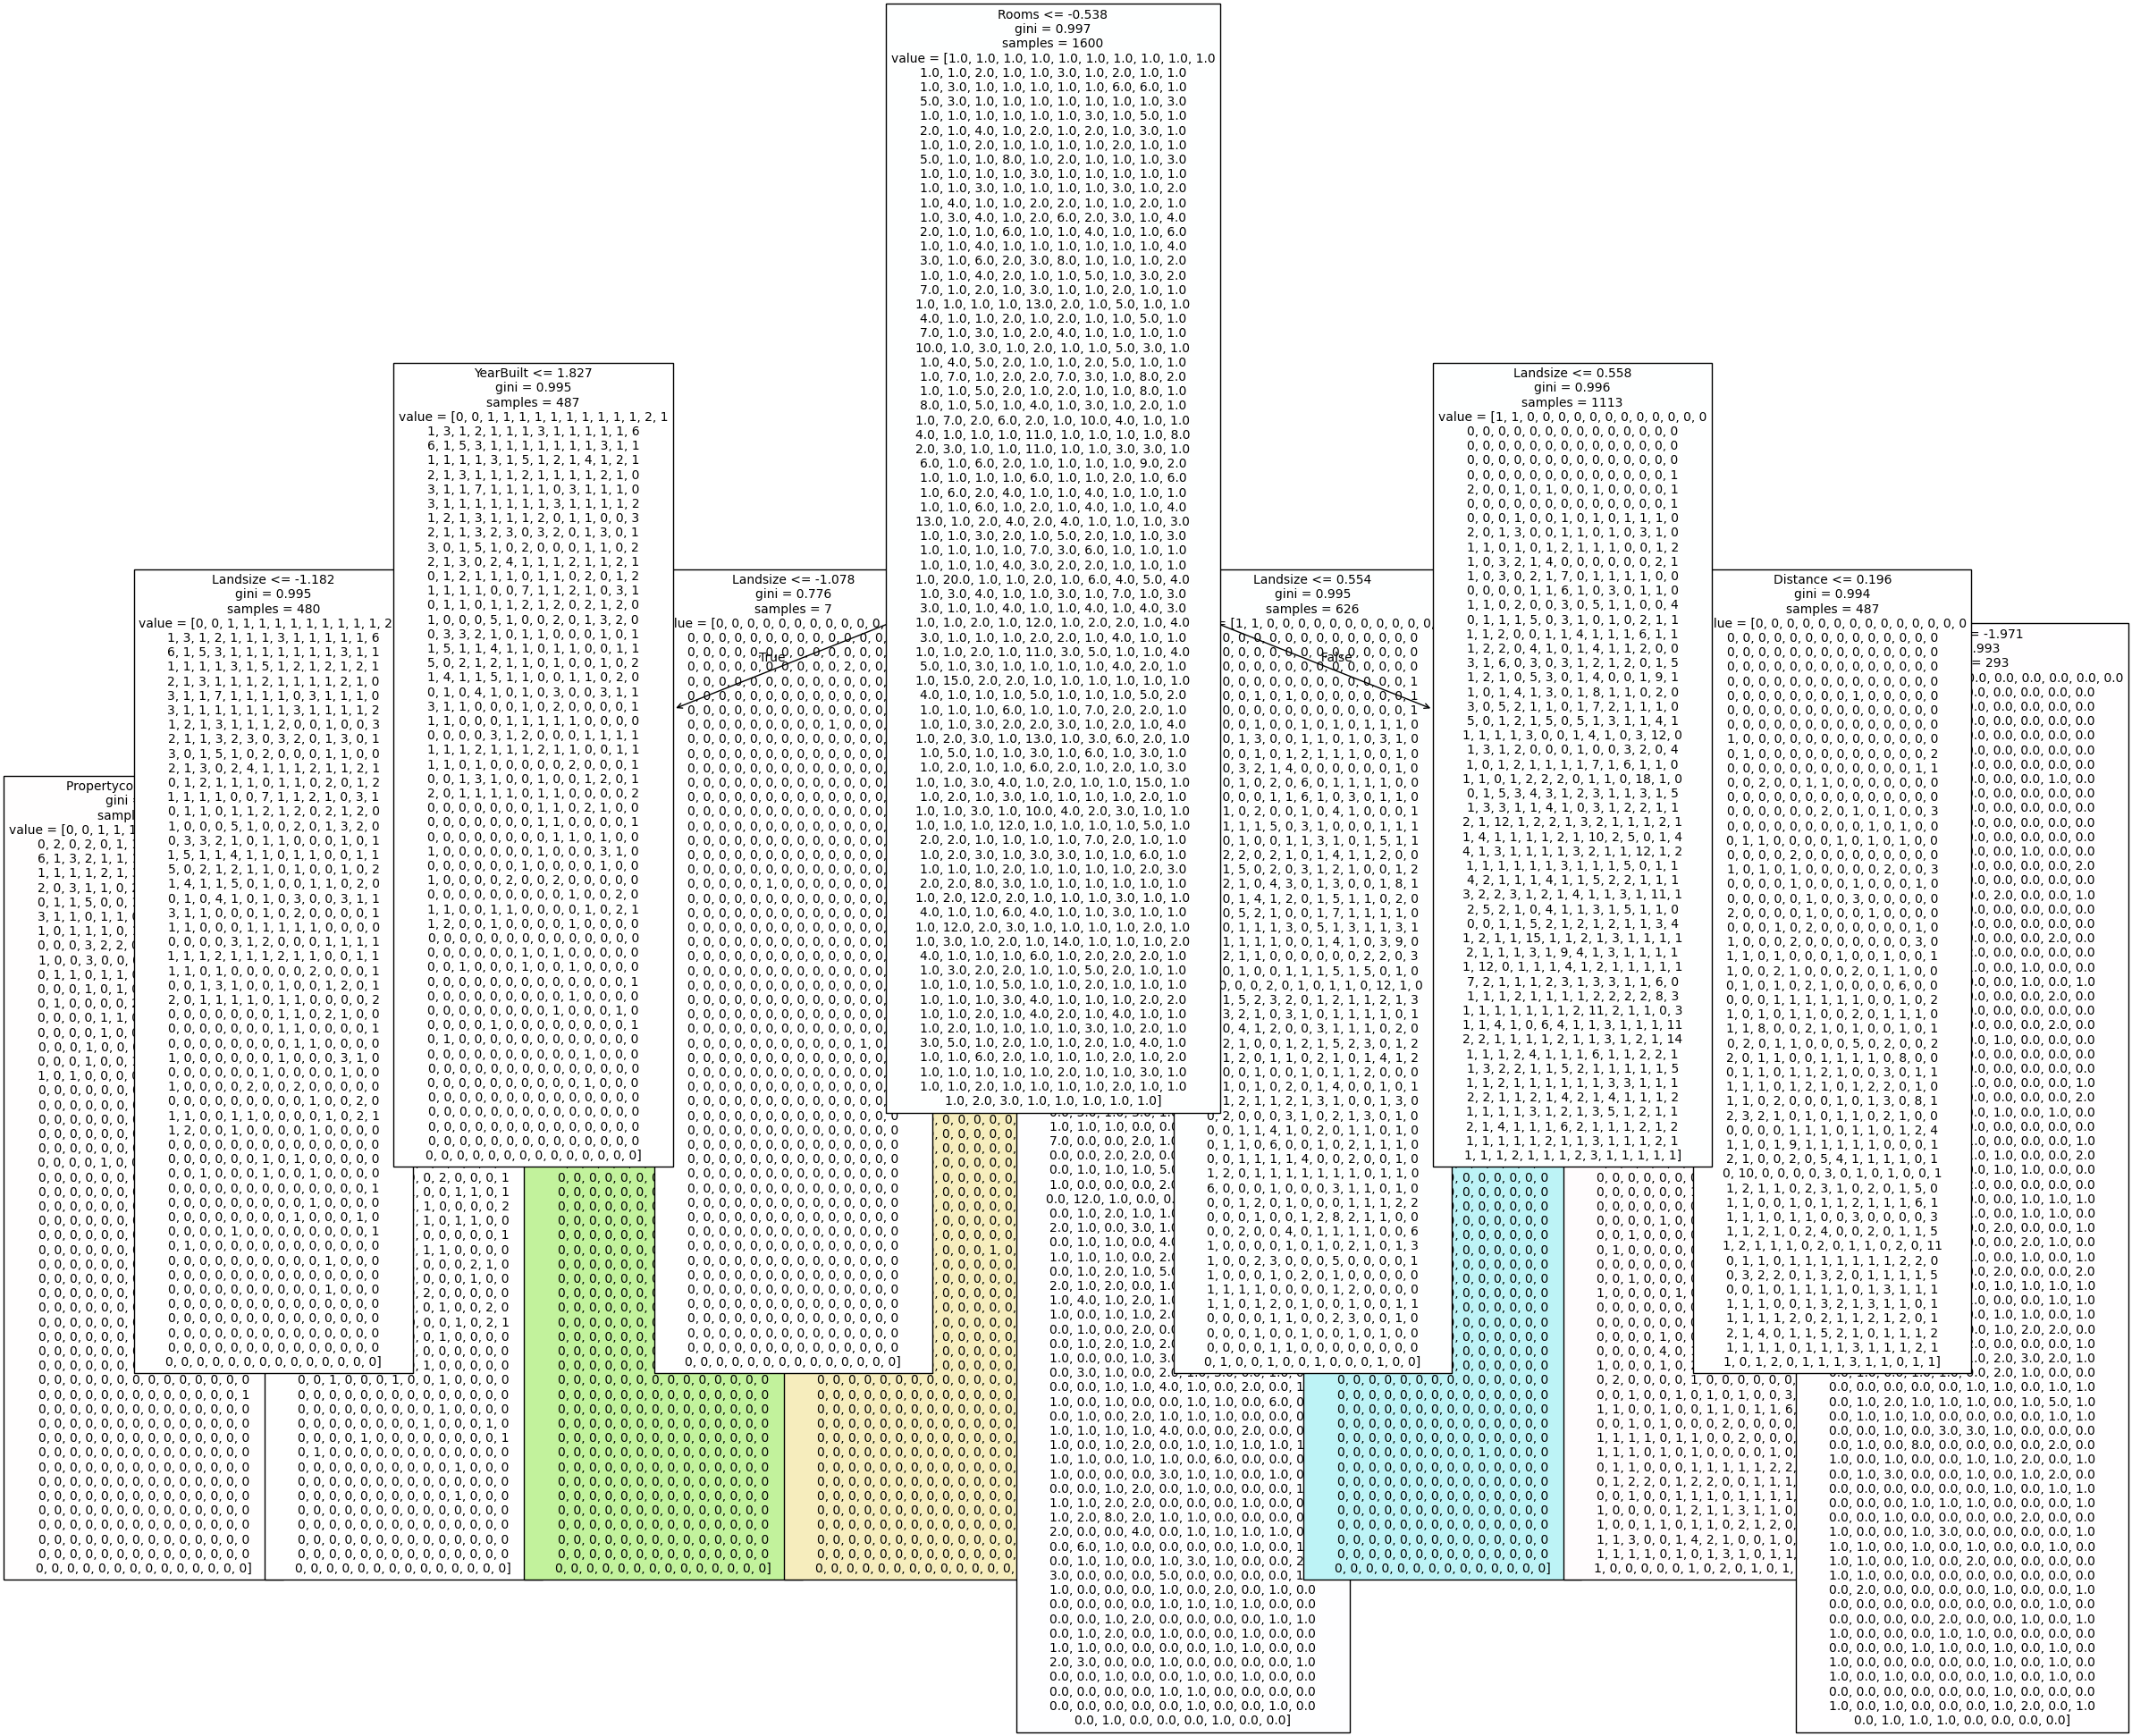

F1-score for Training Set (Decision Tree): 0.9681213404650905
F1-score for Test Set (Decision Tree): 0.9681213404650905


In [1599]:
from sklearn.metrics import f1_score
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming clf3 is your Decision Tree pipeline already fitted
# Visualizing the Decision Tree with limited depth
plt.figure(figsize=(30, 15))
X_train_columns = X_train_clean.columns  # Assuming X_train_clean is your preprocessed training data
tree.plot_tree(clf3.named_steps['decision_tree'], feature_names=X_train_columns, filled=True, fontsize=10, max_depth=3)
plt.show()

# Calculating F1-score
y_pred_train_dt = clf3.predict(X_train_clean)
y_pred_test_dt = clf3.predict(X_test_clean)

f1_train = f1_score(y_train_clean, y_pred_train_dt, average='weighted')
f1_test = f1_score(y_test_clean, y_pred_test_dt, average='weighted')

print("F1-score for Training Set (Decision Tree):", f1_train)
print("F1-score for Test Set (Decision Tree):", f1_test)


Kita akan buat decision tree untuk melihata jalur proses linear relationship terhadap target variable. Bisa kelihatan Decision Tree tidak cocok untuk tugas-nya karena array/list yang diambil semua numerikal dan bukan kategorikal, jadi tidak bisa diklasifikasan ke beberapa bagian tertentu.

Juga terlihat F1-score yang sangat tinggi, ini artinya ada masalah overfitting. 

In [1600]:
from sklearn import tree
import graphviz

# Assuming clf3 is your Decision Tree pipeline already fitted
# Generate DOT data from the decision tree
dot_data = tree.export_graphviz(clf3.named_steps['decision_tree'], out_file=None,
                                feature_names=X_train_clean.columns,
                                filled=True, rounded=True, special_characters=True)

# Create a graph from DOT data
graph = graphviz.Source(dot_data)

# Display the decision tree
#graph.render('decision_tree', format='png', cleanup=True)  # Optional: Save the tree to a file
#graph.view()  # Display in a viewer (opens in a new window)


In [1601]:
#graph

Kita akan coba lihat grafik alternatif dengan X_train data. Data sangat kompleks karena tidak sesuai untuk tugas linear regression. 

In [1602]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming clf4 is your Random Forest pipeline already fitted

# Making predictions
y_pred_train_rf = clf4.predict(X_train_clean)
y_pred_test_rf = clf4.predict(X_test_clean)

# Printing classification reports
print("Classification Report for Training Set (Random Forest):")
print(classification_report(y_train_clean, y_pred_train_rf))

print("\nClassification Report for Test Set (Random Forest):")
print(classification_report(y_test_clean, y_pred_test_rf))

# Printing accuracy scores
train_accuracy_rf = accuracy_score(y_train_clean, y_pred_train_rf)
test_accuracy_rf = accuracy_score(y_test_clean, y_pred_test_rf)

print("\nAccuracy Score for Training Set (Random Forest):", train_accuracy_rf)
print("Accuracy Score for Test Set (Random Forest):", test_accuracy_rf)

# Optional: Printing confusion matrix
# print("\nConfusion Matrix for Training Set:")
# print(confusion_matrix(y_train_clean, y_pred_train_rf))

# print("\nConfusion Matrix for Test Set:")
# print(confusion_matrix(y_test_clean, y_pred_test_rf))


Classification Report for Training Set (Random Forest):
              precision    recall  f1-score   support

    131000.0       1.00      1.00      1.00         1
    145000.0       1.00      1.00      1.00         1
    240000.0       1.00      1.00      1.00         1
    250000.0       0.00      0.00      0.00         1
    252000.0       0.50      1.00      0.67         1
    255000.0       0.00      0.00      0.00         1
    260000.0       0.00      0.00      0.00         1
    265000.0       1.00      1.00      1.00         1
    270000.0       0.50      1.00      0.67         1
    272500.0       0.50      1.00      0.67         1
    275500.0       1.00      1.00      1.00         1
    279500.0       0.00      0.00      0.00         1
    280000.0       1.00      1.00      1.00         2
    285000.0       0.00      0.00      0.00         1
    288000.0       1.00      1.00      1.00         1
    290000.0       1.00      0.67      0.80         3
    292000.0       1.00  

Sama Dengan Decision Tree, random forest classifier tidak cocok untuk tugas Linear Regression karena lebih efisien untuk mendapatkan non-linear relationships. Bisa kelihatan bahwa train dan test set juga overfitting, artinya susah untuk prediksi data baru. 

In [1603]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Boosting

# Assuming clf5 is your Gradient Boosting pipeline already fitted

# Making predictions
y_pred_train_gb = clf5.predict(X_train_clean)
y_pred_test_gb = clf5.predict(X_test_clean)

# Printing classification reports
print("Classification Report for Training Set (Gradient Boosting):")
print(classification_report(y_train_clean, y_pred_train_gb))

print("\nClassification Report for Test Set (Gradient Boosting):")
print(classification_report(y_test_clean, y_pred_test_gb))

# Printing accuracy scores
train_accuracy_gb = accuracy_score(y_train_clean, y_pred_train_gb)
test_accuracy_gb = accuracy_score(y_test_clean, y_pred_test_gb)

print("\nAccuracy Score for Training Set (Gradient Boosting):", train_accuracy_gb)
print("Accuracy Score for Test Set (Gradient Boosting):", test_accuracy_gb)

# Optional: Printing confusion matrix
# print("\nConfusion Matrix for Training Set:")
# print(confusion_matrix(y_train_clean, y_pred_train_gb))

# print("\nConfusion Matrix for Test Set:")
# print(confusion_matrix(y_test_clean, y_pred_test_gb))


Classification Report for Training Set (Gradient Boosting):
              precision    recall  f1-score   support

    131000.0       0.00      0.00      0.00         1
    145000.0       0.00      0.00      0.00         1
    240000.0       0.00      0.00      0.00         1
    250000.0       0.00      0.00      0.00         1
    252000.0       0.00      0.00      0.00         1
    255000.0       0.00      0.00      0.00         1
    260000.0       0.00      0.00      0.00         1
    265000.0       0.00      0.00      0.00         1
    270000.0       0.00      0.00      0.00         1
    272500.0       0.00      0.00      0.00         1
    275500.0       0.00      0.00      0.00         1
    279500.0       0.00      0.00      0.00         1
    280000.0       0.00      0.00      0.00         2
    285000.0       0.00      0.00      0.00         1
    288000.0       0.00      0.00      0.00         1
    290000.0       0.00      0.00      0.00         3
    292000.0       0.

Gradient boosting digunakan untuk bermacam regresi yang biasanya kompleks dan punya data non-linear. Digunakan untuk sequential decision trees yang memperbbaikan model sebelumnya. Classifier tidak cocok untuk test tersebut karena underfitting. 

In [1604]:
r2_scorez = clf5.score(X_test, y_test)
print(r2_scorez)

0.031875


In [1605]:
#Boosting

y_pred1 = clf5.predict(X_train_clean)
mse = mean_squared_error(y_train_clean, y_pred1)
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 640708.6272646561


Sekarang coba prediksi X_train terhadap RMSE untuk melihat data yang bisa akan lebih akurat dengan sequential learning. 

## Model Evaluation

In [1606]:
y_train_pred = clf1.predict(X_train_clean)
y_test_pred = clf1.predict(X_test_clean)

Sekarang mau coba prediksi linear model dengan error dan r2 scores. 

In [1608]:
# Evaluate using metrics MAE, MSE, and Rsquared
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the evaluation report
print("Model Evaluation Metrics:\n")
print(f"Mean Absolute Error (MAE)\n   - Train Set: {mae_train}\n   - Test Set: {mae_test}\n")
print()
print(f"Mean Squared Error (MSE)\n   - Train Set: {mse_train}\n   - Test Set: {mse_test}\n")
print()
print(f"Root Mean Squared Error (RMSE)\n   - Train Set: {rmse_train}\n   - Test Set: {rmse_test}\n")
print()
print(f"R^2 Score\n   - Train Set: {r2_train}\n   - Test Set: {r2_test}")

Model Evaluation Metrics:

Mean Absolute Error (MAE)
   - Train Set: 333710.9326041857
   - Test Set: 333710.9326041857


Mean Squared Error (MSE)
   - Train Set: 226574060193.32565
   - Test Set: 226574060193.32565


Root Mean Squared Error (RMSE)
   - Train Set: 475997.9623835859
   - Test Set: 475997.9623835859


R^2 Score
   - Train Set: 0.5355749742504881
   - Test Set: 0.5355749742504881


Terlihat diatas ada beberapa tipe error seperti MAE, MSE, dan RMSE. Ketiga error harus serendah-rendah mungkin untuk model lebih performa tinggi. 

R2 atau Coefficient of determination adalah pengujian regression model terhadap data. Lebih dari 53% data di model adalah "good fit", artinya model bisa jelaskan lebih dari setengah variansi di dataset tersebut.   

### Cross Validation and Parameter Tuning

In [1610]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Example cross-validation for Linear Regression (clf1)
cv_scores_mae = cross_val_score(clf1, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
cv_scores_mse = cross_val_score(clf1, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores_rmse = cross_val_score(clf1, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
cv_scores_r2 = cross_val_score(clf1, X_train, y_train, cv=5, scoring="r2")

# Convert negative scores to positive for MAE, MSE, RMSE
cv_scores_mae = -cv_scores_mae
cv_scores_mse = -cv_scores_mse
cv_scores_rmse = -cv_scores_rmse

# Print cross-validation results
print("Linear Regression Model (clf1)")
print('Mean Absolute Error (MAE) - All - Cross Validation  : ', cv_scores_mae)
print('MAE - Mean - Cross Validation : ', cv_scores_mae.mean())
print('MAE - Std - Cross Validation  : ', cv_scores_mae.std())
print('-'*50)

print('Mean Squared Error (MSE) - All - Cross Validation  : ', cv_scores_mse)
print('MSE - Mean - Cross Validation : ', cv_scores_mse.mean())
print('MSE - Std - Cross Validation  : ', cv_scores_mse.std())
print('-'*50)

print('Root Mean Squared Error (RMSE) - All - Cross Validation  : ', cv_scores_rmse)
print('RMSE - Mean - Cross Validation : ', cv_scores_rmse.mean())
print('RMSE - Std - Cross Validation  : ', cv_scores_rmse.std())
print('-'*50)

print('R^2 Score - All - Cross Validation  : ', cv_scores_r2)
print('R^2 Score - Mean - Cross Validation : ', cv_scores_r2.mean())
print('R^2 Score - Std - Cross Validation  : ', cv_scores_r2.std())
print('-'*50)


Linear Regression Model (clf1)
Mean Absolute Error (MAE) - All - Cross Validation  :  [355890.69093339 317326.30879805 317049.33766558 355154.06355726
 337193.86047283]
MAE - Mean - Cross Validation :  336522.8522854203
MAE - Std - Cross Validation  :  17148.822191910975
--------------------------------------------------
Mean Squared Error (MSE) - All - Cross Validation  :  [2.91025085e+11 1.93836330e+11 1.86931673e+11 2.65624965e+11
 2.15653687e+11]
MSE - Mean - Cross Validation :  230614348037.1316
MSE - Std - Cross Validation  :  40889657686.052345
--------------------------------------------------
Root Mean Squared Error (RMSE) - All - Cross Validation  :  [539467.40865652 440268.47528432 432355.95647107 515388.16949119
 464385.27808966]
RMSE - Mean - Cross Validation :  478373.05759855063
RMSE - Std - Cross Validation  :  42113.72461496857
--------------------------------------------------
R^2 Score - All - Cross Validation  :  [0.48423008 0.54473855 0.55368422 0.53728281 0.524473

Sekarang akan gunakan cross variance untuk menguji beberapa "fit" model yang digunakan bisa dipakai lagi untuk independent dataset. Biar bisa evaluasi performa model, data akan dibagi jadi subsets, dan akan di-train. 

Terlihat jawaban dari R2 score tidak terlalu beda dari yang diatas. 

In [1611]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example cross-validation for SVM (clf2)
cv_scores_accuracy = cross_val_score(clf2, X_train, y_train, cv=5, scoring="accuracy")
cv_scores_precision = cross_val_score(clf2, X_train, y_train, cv=5, scoring="precision")
cv_scores_recall = cross_val_score(clf2, X_train, y_train, cv=5, scoring="recall")
cv_scores_f1 = cross_val_score(clf2, X_train, y_train, cv=5, scoring="f1")

# Print cross-validation results
print("Support Vector Machine Model (clf2)")
print('Accuracy - All - Cross Validation  : ', cv_scores_accuracy)
print('Accuracy - Mean - Cross Validation : ', cv_scores_accuracy.mean())
print('Accuracy - Std - Cross Validation  : ', cv_scores_accuracy.std())
print('-'*50)

print('Precision - All - Cross Validation  : ', cv_scores_precision)
print('Precision - Mean - Cross Validation : ', cv_scores_precision.mean())
print('Precision - Std - Cross Validation  : ', cv_scores_precision.std())
print('-'*50)

print('Recall - All - Cross Validation  : ', cv_scores_recall)
print('Recall - Mean - Cross Validation : ', cv_scores_recall.mean())
print('Recall - Std - Cross Validation  : ', cv_scores_recall.std())
print('-'*50)

print('F1 Score - All - Cross Validation  : ', cv_scores_f1)
print('F1 Score - Mean - Cross Validation : ', cv_scores_f1.mean())
print('F1 Score - Std - Cross Validation  : ', cv_scores_f1.std())
print('-'*50)


Support Vector Machine Model (clf2)
Accuracy - All - Cross Validation  :  [0.0125   0.01875  0.0125   0.00625  0.009375]
Accuracy - Mean - Cross Validation :  0.011875
Accuracy - Std - Cross Validation  :  0.00414578098794425
--------------------------------------------------
Precision - All - Cross Validation  :  [nan nan nan nan nan]
Precision - Mean - Cross Validation :  nan
Precision - Std - Cross Validation  :  nan
--------------------------------------------------
Recall - All - Cross Validation  :  [nan nan nan nan nan]
Recall - Mean - Cross Validation :  nan
Recall - Std - Cross Validation  :  nan
--------------------------------------------------
F1 Score - All - Cross Validation  :  [nan nan nan nan nan]
F1 Score - Mean - Cross Validation :  nan
F1 Score - Std - Cross Validation  :  nan
--------------------------------------------------


Disini kita akan uji SVM (Linear). Akurasi rendah karena test tidak cocok.

In [1612]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example cross-validation for Decision Tree (clf3)
cv_scores_accuracy = cross_val_score(clf3, X_train, y_train, cv=5, scoring="accuracy")
cv_scores_precision = cross_val_score(clf3, X_train, y_train, cv=5, scoring="precision")
cv_scores_recall = cross_val_score(clf3, X_train, y_train, cv=5, scoring="recall")
cv_scores_f1 = cross_val_score(clf3, X_train, y_train, cv=5, scoring="f1")

# Print cross-validation results
print("Decision Tree Model (clf3)")
print('Accuracy - All - Cross Validation  : ', cv_scores_accuracy)
print('Accuracy - Mean - Cross Validation : ', cv_scores_accuracy.mean())
print('Accuracy - Std - Cross Validation  : ', cv_scores_accuracy.std())
print('-'*50)

print('Precision - All - Cross Validation  : ', cv_scores_precision)
print('Precision - Mean - Cross Validation : ', cv_scores_precision.mean())
print('Precision - Std - Cross Validation  : ', cv_scores_precision.std())
print('-'*50)

print('Recall - All - Cross Validation  : ', cv_scores_recall)
print('Recall - Mean - Cross Validation : ', cv_scores_recall.mean())
print('Recall - Std - Cross Validation  : ', cv_scores_recall.std())
print('-'*50)

print('F1 Score - All - Cross Validation  : ', cv_scores_f1)
print('F1 Score - Mean - Cross Validation : ', cv_scores_f1.mean())
print('F1 Score - Std - Cross Validation  : ', cv_scores_f1.std())
print('-'*50)


Decision Tree Model (clf3)
Accuracy - All - Cross Validation  :  [0.       0.       0.0125   0.015625 0.0125  ]
Accuracy - Mean - Cross Validation :  0.008125
Accuracy - Std - Cross Validation  :  0.006731456008918131
--------------------------------------------------
Precision - All - Cross Validation  :  [nan nan nan nan nan]
Precision - Mean - Cross Validation :  nan
Precision - Std - Cross Validation  :  nan
--------------------------------------------------
Recall - All - Cross Validation  :  [nan nan nan nan nan]
Recall - Mean - Cross Validation :  nan
Recall - Std - Cross Validation  :  nan
--------------------------------------------------
F1 Score - All - Cross Validation  :  [nan nan nan nan nan]
F1 Score - Mean - Cross Validation :  nan
F1 Score - Std - Cross Validation  :  nan
--------------------------------------------------


Disini kita akan uji Decision Tree. Akurasi rendah karena test tidak cocok.

In [1613]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example cross-validation for Random Forest (clf4)
cv_scores_accuracy = cross_val_score(clf4, X_train, y_train, cv=5, scoring="accuracy")
cv_scores_precision = cross_val_score(clf4, X_train, y_train, cv=5, scoring="precision")
cv_scores_recall = cross_val_score(clf4, X_train, y_train, cv=5, scoring="recall")
cv_scores_f1 = cross_val_score(clf4, X_train, y_train, cv=5, scoring="f1")

# Print cross-validation results
print("Random Forest Model (clf4)")
print('Accuracy - All - Cross Validation  : ', cv_scores_accuracy)
print('Accuracy - Mean - Cross Validation : ', cv_scores_accuracy.mean())
print('Accuracy - Std - Cross Validation  : ', cv_scores_accuracy.std())
print('-'*50)

print('Precision - All - Cross Validation  : ', cv_scores_precision)
print('Precision - Mean - Cross Validation : ', cv_scores_precision.mean())
print('Precision - Std - Cross Validation  : ', cv_scores_precision.std())
print('-'*50)

print('Recall - All - Cross Validation  : ', cv_scores_recall)
print('Recall - Mean - Cross Validation : ', cv_scores_recall.mean())
print('Recall - Std - Cross Validation  : ', cv_scores_recall.std())
print('-'*50)

print('F1 Score - All - Cross Validation  : ', cv_scores_f1)
print('F1 Score - Mean - Cross Validation : ', cv_scores_f1.mean())
print('F1 Score - Std - Cross Validation  : ', cv_scores_f1.std())
print('-'*50)


Random Forest Model (clf4)
Accuracy - All - Cross Validation  :  [0.003125 0.0125   0.0125   0.0125   0.0125  ]
Accuracy - Mean - Cross Validation :  0.010625
Accuracy - Std - Cross Validation  :  0.0037500000000000007
--------------------------------------------------
Precision - All - Cross Validation  :  [nan nan nan nan nan]
Precision - Mean - Cross Validation :  nan
Precision - Std - Cross Validation  :  nan
--------------------------------------------------
Recall - All - Cross Validation  :  [nan nan nan nan nan]
Recall - Mean - Cross Validation :  nan
Recall - Std - Cross Validation  :  nan
--------------------------------------------------
F1 Score - All - Cross Validation  :  [nan nan nan nan nan]
F1 Score - Mean - Cross Validation :  nan
F1 Score - Std - Cross Validation  :  nan
--------------------------------------------------


Disini kita akan uji Random Forest. Akurasi rendah karena test tidak cocok.

In [1654]:
# #INI PROSES SANGAT LAMA

# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Example cross-validation for Gradient Boosting (clf5)
# cv_scores_r2 = cross_val_score(clf5, X_train, y_train, cv=5, scoring="accuracy")
# #cv_scores_precision = cross_val_score(clf5, X_train, y_train, cv=5, scoring="precision")
# #cv_scores_recall = cross_val_score(clf5, X_train, y_train, cv=5, scoring="recall")
# #cv_scores_f1 = cross_val_score(clf5, X_train, y_train, cv=5, scoring="f1")

# # Print cross-validation results
# print("Gradient Boosting Model (clf5)")
# print('Accuracy - All - Cross Validation  : ', cv_scores_r2)
# # print('Accuracy - Mean - Cross Validation : ', cv_scores_r2.mean())
# # print('Accuracy - Std - Cross Validation  : ', cv_scores_r2.std())
# # print('-'*50)



Disini kita akan uji Gradient Boosting. Akurasi rendah karena test tidak cocok.

### Random Search

In [1622]:
# # Define the Pipeline

# pipe = Pipeline([('scaler', MinMaxScaler()), ('logreg', LinearRegression())])

In [1623]:
def performance_check(clf, X, y):
    y_pred = clf.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)  # RMSE is the square root of MSE
    r2 = r2_score(y, y_pred)

    return {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    }


Sini kita buat performance check untuk errors and R2 score.

In [1624]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import numpy as np


# Define the pipeline including preprocessing and model for Linear Regression
clf1 = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'regressor__fit_intercept': [True, False],
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    # Add more parameters and their distributions as needed
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(clf1, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, random_state=42)

# Fit the randomized search
random_search.fit(X_train_clean, y_train)

# Print best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Negative Mean Squared Error:", random_search.best_score_)

# Get the best estimator
best_clf1 = random_search.best_estimator_

# Optionally, evaluate performance on a test set if available
y_pred = best_clf1.predict(X_test_clean)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse}")


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'regressor__fit_intercept': True, 'preprocessor__num__imputer__strategy': 'mean'}
Best Negative Mean Squared Error: -230614348037.1316
Root Mean Squared Error (RMSE) on Test Set: 475997.9623835859


Kita telah set hyperparameter untuk Random Search terhadap model kita. Kita akan gunakan CLF1 "linear regression" untuk optimisasi model tersebut jadi tidak overfitting. 

In [1625]:
random_search.fit(X_train_clean, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('outlier_gaussian',
                                                                                                Winsorizer(fold=3,
                                                                                                           missing_values='ignore',
                                                                                                           tail='both',
                                                                                                           variables=['Distance',
                                                                                                                      'YearBuilt',
                                                                                                                      'Propertycount'])),
                                                                                               ('outlier_iqr',
                                                                                                Winsorizer(capping_method='iqr',
                                                                                                           fold=1.5,
                                                                                                           tail='both',
                                                                                                           variables=['Rooms',
                                                                                                                      'Bathroom',
                                                                                                                      'Car...
                                                                                                StandardScaler())]),
                                                                               ['Rooms',
                                                                                'Distance',
                                                                                'Bathroom',
                                                                                'Car',
                                                                                'Landsize',
                                                                                'BuildingArea',
                                                                                'YearBuilt',
                                                                                'Propertycount']),
                                                                              ('cat',
                                                                               'passthrough',
                                                                               [])])),
                                             ('regressor',
                                              LinearRegression())]),
                   param_distributions={'preprocessor__num__imputer__strategy': ['mean',
                                                                                 'median'],
                                        'regressor__fit_intercept': [True,
                                                                     False]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

masukan data X_train dan y_train ke random_search dengan fungsi fit. 

In [1626]:
random_search.best_params_

{'regressor__fit_intercept': True,
 'preprocessor__num__imputer__strategy': 'mean'}

masukan dictionary kedalam random search. 

In [1627]:
best_clf1 = random_search.best_estimator_
best_clf1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier_gaussian',
                                                                   Winsorizer(fold=3,
                                                                              missing_values='ignore',
                                                                              tail='both',
                                                                              variables=['Distance',
                                                                                         'YearBuilt',
                                                                                         'Propertycount'])),
                                                                  ('outlier_iqr',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['Rooms',
                                                                                         'Bathroom',
                                                                                         'Car',
                                                                                         'Landsize',
                                                                                         'BuildingArea'])),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Rooms', 'Distance',
                                                   'Bathroom', 'Car',
                                                   'Landsize', 'BuildingArea',
                                                   'YearBuilt',
                                                   'Propertycount']),
                                                 ('cat', 'passthrough', [])])),
                ('regressor', LinearRegression())])

Masukan best estimator tuning kedalam random search. Terus masukan ke variable baru. 

In [1628]:
best_regressor = best_clf1.named_steps['regressor']
best_preprocessor = best_clf1.named_steps['preprocessor']

Kita mau tarik data dari dari random search dari input regressor dan preprocessor. 

In [1629]:
best_regressor

LinearRegression()

In [1630]:
best_preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('outlier_gaussian',
                                                  Winsorizer(fold=3,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['Distance',
                                                                        'YearBuilt',
                                                                        'Propertycount'])),
                                                 ('outlier_iqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Rooms',
                                                                        'Bathroom',
                                                                        'Car',
                                                                        'Landsize',
                                                                        'BuildingArea'])),
                                                 ('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Rooms', 'Distance', 'Bathroom', 'Car',
                                  'Landsize', 'BuildingArea', 'YearBuilt',
                                  'Propertycount']),
                                ('cat', 'passthrough', [])])

In [1631]:
# Get result from a particular step such as coefficients and intercept from Logistic Regression

print('Coefficient : ', best_clf1.named_steps['regressor'].coef_)
print('Intercept   : ', best_clf1.named_steps['regressor'].intercept_)

Coefficient :  [ 132170.09243312 -129259.49333926  200375.86912614   36395.34308928
  195031.94791959  106469.09015283  -90136.58042171   12972.88208969]
Intercept   :  1247863.1099999999


In [ ]:
"""
Numerical (Coefficients):
    'Rooms','Distance','Bathroom','Car',
    'Landsize','BuildingArea','YearBuilt','Propertycount'

Target:
    'Price'
"""

Sekarang sudah dapat Coefficient dan Intercept dari hyperparameter. Bisa dibilang ada variasi sedikit dari yang linear regresi awal.

In [1632]:
# Check the Performance

print('R2 - Train : ', performance_check(best_clf1, X_train_clean, y_train))
print('R2 - Test  : ', performance_check(best_clf1, X_test_clean, y_test))

R2 - Train :  {'MAE': 333710.9326041857, 'MSE': 226574060193.32565, 'RMSE': 475997.9623835859, 'R²': 0.5355749742504881}
R2 - Test  :  {'MAE': 333710.9326041857, 'MSE': 226574060193.32565, 'RMSE': 475997.9623835859, 'R²': 0.5355749742504881}


Kita gunakan performance check yang dari awal untuk membandingkan errors yang akan didapatkan dan R2. Dari observasi, error dan R2 tidak terlalu memiliki variansi besar. 

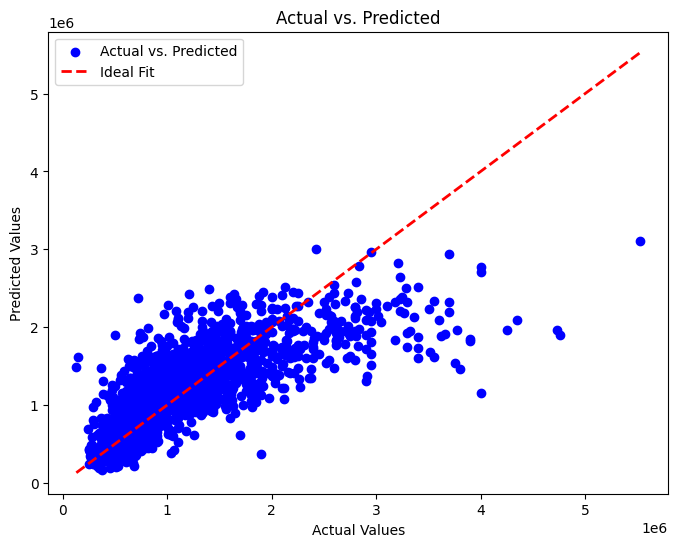

In [1633]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train_clean, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y_train_clean.min(), y_train_clean.max()], [y_train_clean.min(), y_train_clean.max()], color='red', linestyle='--', linewidth=2, label='Ideal Fit')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Kita mau lihat sekali lagi linear relationship antar actual dan predicted values. kelihatan ada korelasi positif yang parallel dengan garis trend line.

## Model Saving

In [1637]:
# Assuming X_train_columns is a DataFrame
column_list = X_train_columns.tolist()
print(column_list)


['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Propertycount']


namakan kolom baru untuk disimpan.

In [1638]:
#Model saving

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(column_list, file_1)

with open('model.pkl', 'wb') as file_2:
  pickle.dump(lr, file_2)

Kita akan save data-data tersebut didalam Json files.

## Model Inference 

In [1639]:
# Load the saved list of numerical columns
with open('list_num_cols.txt', 'r') as file_1:
    combined_columns = json.load(file_1)

# Load the saved model
with open('model.pkl', 'rb') as file_2:
    lr = pickle.load(file_2)

Kita akan coba buka yang kita tadi save untuk dipake untuk inference.

In [1640]:
# Assuming df_data_dummy is your DataFrame with the data
df_data_dummy = pd.DataFrame({

    "Suburb": ["Abbotsford", "Abbotsford", "Abbotsford", "Abbotsford", "Abbotsford"],
    "Rooms": [2, 3, 4, 3, 2],
    "Price": [1035000.0, 1465000.0, 1600000.0, 1876000.0, 1636000.0],
    "Distance": [2.5, 2.5, 2.5, 2.5, 2.5],
    "Bathroom": [1.0, 2.0, 1.0, 2.0, 1.0],
    "Car": [0.0, 0.0, 2.0, 0.0, 2.0],
    "Landsize": [156.0, 134.0, 120.0, 245.0, 256.0],
    "BuildingArea": [79.0, 150.0, 142.0, 210.0, 107.0],
    "YearBuilt": [1900.0, 1900.0, 2014.0, 1910.0, 1890.0],
    "Propertycount": [4019.0, 4019.0, 4019.0, 4019.0, 4019.0]

})

df_dummy_data = pd.DataFrame(df_data_dummy)
print("Original Dummy Data:")
print(df_dummy_data)



Original Dummy Data:
       Suburb  Rooms      Price  Distance  Bathroom  Car  Landsize  \
0  Abbotsford      2  1035000.0       2.5       1.0  0.0     156.0   
1  Abbotsford      3  1465000.0       2.5       2.0  0.0     134.0   
2  Abbotsford      4  1600000.0       2.5       1.0  2.0     120.0   
3  Abbotsford      3  1876000.0       2.5       2.0  0.0     245.0   
4  Abbotsford      2  1636000.0       2.5       1.0  2.0     256.0   

   BuildingArea  YearBuilt  Propertycount  
0          79.0     1900.0         4019.0  
1         150.0     1900.0         4019.0  
2         142.0     2014.0         4019.0  
3         210.0     1910.0         4019.0  
4         107.0     1890.0         4019.0  


Kita akan membuat dataset "dummy" baru dan masukan ke dataframe dinamakan "df_dummy_data". Kita mau uji nanti dengan linear regression.

In [1655]:
df_dummy_data

Suburb  Rooms      Price  Distance  Bathroom  Car  Landsize  \
0  Abbotsford      2  1035000.0       2.5       1.0  0.0     156.0   
1  Abbotsford      3  1465000.0       2.5       2.0  0.0     134.0   
2  Abbotsford      4  1600000.0       2.5       1.0  2.0     120.0   
3  Abbotsford      3  1876000.0       2.5       2.0  0.0     245.0   
4  Abbotsford      2  1636000.0       2.5       1.0  2.0     256.0   

   BuildingArea  YearBuilt  Propertycount  
0          79.0     1900.0         4019.0  
1         150.0     1900.0         4019.0  
2         142.0     2014.0         4019.0  
3         210.0     1910.0         4019.0  
4         107.0     1890.0         4019.0

In [1656]:
X_train_columns

Index(['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'Propertycount'],
      dtype='object')

In [1643]:
df_dummy_data_new = df_dummy_data[combined_columns]

masukan kolom ke data dummy. Berikutnya namakan variable baru.

In [1644]:
predictions = lr.predict(df_dummy_data_new)

Akan membuat prediksi dengan linear regression di test. 

In [1645]:
predictions

array([1101277.02454045, 1665725.95948649, 1297970.1974852 ,
       1639455.71625785, 1297855.42299958])

Keluarlah prediksi harga rumah di beberapa bulan kedepan. Harganya semua diatas AU$1 Juta.

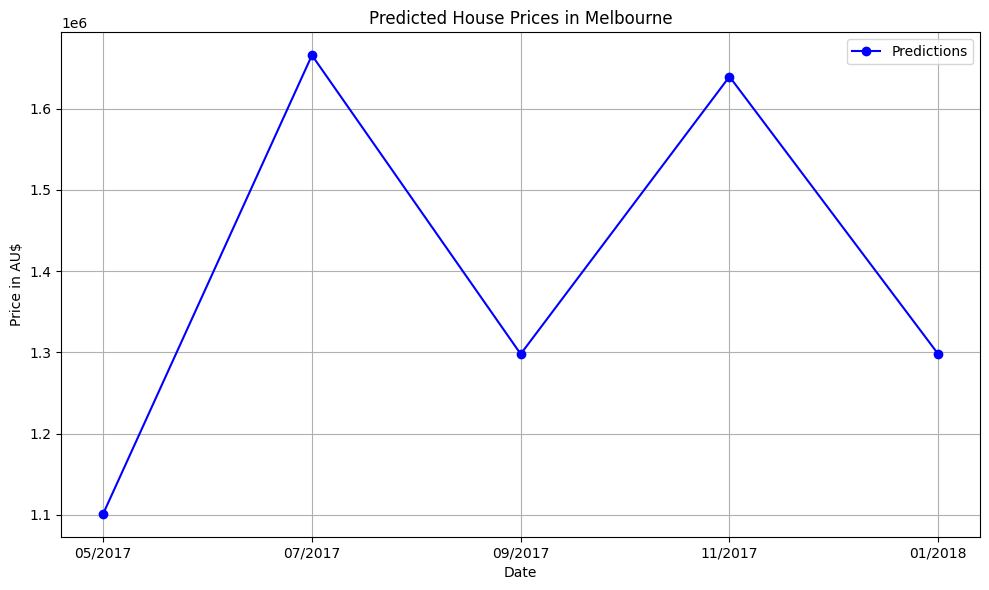

In [1646]:
# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(predictions, marker='o', linestyle='-', color='b', label='Predictions')
plt.title('Predicted House Prices in Melbourne')
plt.xlabel('Date')
plt.ylabel('Price in AU$')
plt.legend()
plt.xticks(range(len(predictions)), ['05/2017', '07/2017', '09/2017', '11/2017', '01/2018'])  # Replace with actual labels if available
plt.grid(True)
plt.tight_layout()
plt.show()

Bisa kelihatan jika dimasukan ke timeseries chart dengan time-frame yang sama di EDA, maka bisa lihat trend naik-turun terhadap harga rumah di Melbourne.

In [1647]:
predictions.mean()

1400456.8641539158

Harga rata-rata 10 bulan kedepan. (2 bulan x 5 interval = 10 bulan)

In [1648]:
predictions.max()

1665725.9594864864

harga rumah tertinggi 10 bulan kedepan.

In [1649]:
predictions.min()

1101277.0245404532

harga rumah terendah 10 bulan kedepan.

In [1650]:
# Predict the score
predicted_score = lr.predict(df_dummy_data_new)

# Show result
print(f"Predicted Overall: {predicted_score[0]:.2f}")

Predicted Overall: 1101277.02


Dengan output prediksi dari Linear Regression, kita bisa bilang bahwa harga rumah di Melbourne 1 tahun kemudian akan naik turun antara AU$ 1.7 Juta setingginya, dan AU$ 1.1 Juta serendahnya. Ini bisa dilihat di trend EDA jika harga rumah ada puncaknya oleh karena musim atau "season" yang orang atau perusahaan beli rumah dengan rombongan di kota Melbourne. 

Teori sebelumnya adalah harga rumah akan selalu naik, tetapi setelah di train dan test dengan linear regression, bisa dilihat bahwa setiap bulan kedepan pasti ada bulan yang harga akan anjlok kebawah. 

## Conclusion


Pada kesimpulan, harga rumah di Melbourne susah diprediksi karena harus mengikuti trend "Consumer sentiment" terhadap business climate di negara itu. Bisakah negara memiliki perekonomian yang baik untuk mendorong harga rumah di kota tersebut untuk naik terus, dan pembeli individu atau perusahaan akan sangat optimis terhadap investasi di rumah lama atau baru. Dengan analisa itu, kita bisa lihat lebih dalam terhadap puncak dan jurang harga rumah karena faktor-faktor lain seperti jarak jauh dari CBD, jumlah kamar, luas lahan, dan beberapa mobil bisa muat di garasi memiliki dampak yang sangat efektif terhadap harga rumah rata-rata. 

Bisa saja harga rumah bisa di-segmentasikan jadi setiap perumahan atau lingkungan memiliki "pasar pembeli", jadi daerah tersebut bisa lebih dianalisa terhadap isu tingkat sosial, fasilitas, persekolahan, dan faktor lain yang bisa berdampak terhadap persepsi harga rumah. Oleh karena sentiment publik sangat efektif dengan setiap lingkungan atau kota, maka prediksi harus memiliki parameter yang tertentu karena setiap "market" punya pola pembeli individu/konsumer. 

Sebagai saran penutup, terlihat bahwa harga rumah rata-rata di melbourne akan tidak naik terlalu drastis karena setiap bulan akan turun juga dengan drastis. Dari serendahnya investor akan mendapatkan harga termurah itu AU$ 1.1 Juta, dan kalau mau jual paling tinggi tidak lebih dari AU $1.7 Juta. 

Jika ada individu atau perusahaan yang mau beli rumah di Melbourne, sarannya bukan untuk di-investasi karena harga tidak bisa naik terus, jadi lebih baik untuk dijadikan tempat tinggal saja (homeowner, not investor). 

### Pertanyaan (objective):
-Dengan Linear Regression, bisakah kita prediksi harga rumah bisa naik terus?

    Kita bisa prediksi rumah dengan cara train dan test model dengan Pipeline. Dari grafik time-series harga rumah akan naik dan turun dalam satu tahun kedepan.

-Kolom Numerikal apa saja yang memiliki dampak paling besar terhadap harga rumah?

    Bathroom dan Landsize adalah faktor yang mempunyai coefficient positif terhadap harga rumah.

-Apakah ada dampak signifikan antara harga rumah yang dekat CBD (Central Business District) dengan yang jauh? 

    Distance tidak memiliki dampak signifikan terhadap harga rumah, malah coefficient cenderung negatif. Ini artinya jika rumah lebih jauh, maka harga rumah lebih mahal. 

### Conceptual Problems
### Jawab pertanyaan berikut:

Jelaskan latar belakang adanya bagging dan cara kerja bagging !

    Bagging adalah teknik yang digunakan untuk mengurangi variansi dalam model prediktif dengan cara menggabungkan hasil dari beberapa model yang sama jenisnya, yang dibangun dari sampel data yang diambil secara acak dengan penggantian. Latar belakangnya adalah untuk meningkatkan akurasi dan konsistensi model, terutama pada model yang cenderung overfitting terhadap data training.

    Bootstrap Sampling: Membuat beberapa dataset acak dari dataset pelatihan dengan melakukan sampling dengan penggantian.

    Model Training: Membangun model pada setiap dataset bootstrap yang dihasilkan.
    
    Aggregating: Menggabungkan hasil prediksi dari semua model yang dibangun, misalnya dengan menggunakan rata-rata atau voting.

Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih!

    Random Forest:

    Cara Kerja: Random Forest juga merupakan jenis ensemble yang menggunakan teknik bagging dengan pohon keputusan.
    Perbedaan Utama: Setiap pohon keputusan dalam Random Forest dilatih secara independen, dan hasil dari semua pohon digunakan untuk menghasilkan prediksi akhir dengan cara voting.
    
    Gradient Boosting:

    Cara Kerja: Gradient Boosting adalah jenis ensemble yang membangun model secara bertahap, di mana setiap model berikutnya berfokus untuk memperbaiki kesalahan prediksi model sebelumnya.
    Perbedaan Utama: Gradient Boosting tidak menggunakan bagging tetapi menggunakan boosting, di mana setiap model ditambahkan secara berurutan untuk mengoreksi kesalahan prediksi yang sebelumnya terjadi.

Jelaskan apa yang dimaksud dengan Cross Validation !

    Definisi: Cross Validation adalah teknik untuk mengevaluasi kinerja model machine learning dengan cara membagi dataset menjadi subset yang lebih kecil, kemudian melakukan pelatihan dan pengujian model pada subset-subset ini secara bergantian.

    Tujuan: Mengukur seberapa baik model akan berkinerja pada data yang tidak terlihat dengan menghindari overfitting atau underfitting.
    
    Cara Kerja: Dalam validasi silang K-Fold, data dibagi menjadi K subset yang sama ukurannya. Model dilatih pada K-1 subset dan diuji pada subset yang tersisa, dilakukan K kali. Hasil akhir evaluasi adalah rata-rata dari semua pengujian.

### Business Recommendation

Setelah analisis, ada beberapa saran yang bisa dikasih terhadap pembeli rumah dan perusahaan:

1. Jangan tunggu untuk beli rumah - Oleh karena trend harga rumah sangat susah diprediksi bulan ke bulan, tidak ada gunakan untuk pembeli nunggu sampai harga murah. Harga rumah adalah refleksi dari sentimen pasar properti. 
2. Beli share-room atau duplex daripada single house - Pembeli tidak harus beli rumah yang besar dulu di dekat CBD Melbourne. Pembeli harus coba investasi di properti yang lebih jauh dan sederhana untuk naik "property ladder". 
3. Lihat dikota lain untuk investasi - Melbourne adalah kota mahal dan sudah saturasi. Harga rumah tidak akan naik lagi dengan banyak dan harga bisa juga turun drastis. Pembeli rumah harus hati-hati untuk tidak mengambil resiko beli properti tidak mengetahui harga pasaran di setiap lingkungan atau daerah.  